**Problem Statement 1:**
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

**Dataset Information:**
The walmart.csv contains 6435 rows and 8 columns.

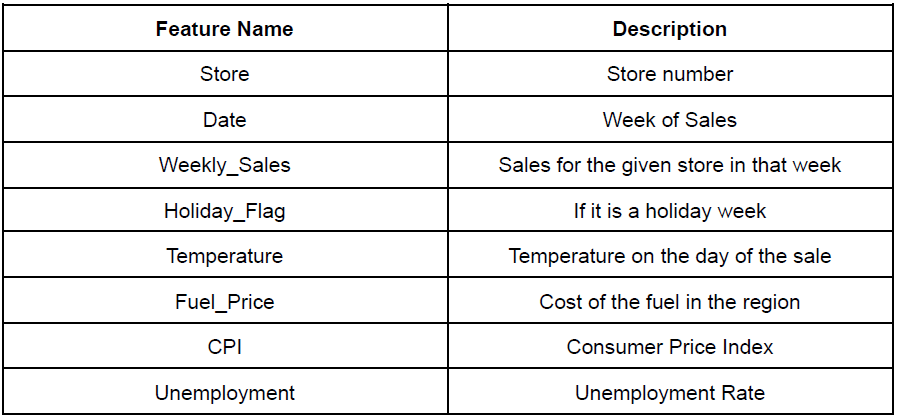

1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# create a dataframe for .csv file and load the data
df = pd.read_csv("/content/Walmart DataSet.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
# converting datatype of Date from Object to datetime
from datetime import datetime
df['Date'] = pd.to_datetime (df['Date'], format="%d-%m-%Y")

In [11]:
df.info() # verifying after converting datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Data Preprocessing**

In [12]:

# find null values if any
df.isnull().sum() # no null values found

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
# find duplicated values if any
df.duplicated().sum() # no duplicated data found

0

In [14]:
# find NA values if any and drop it
df.dropna() # no NA values found in the data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

**Finding outliers**

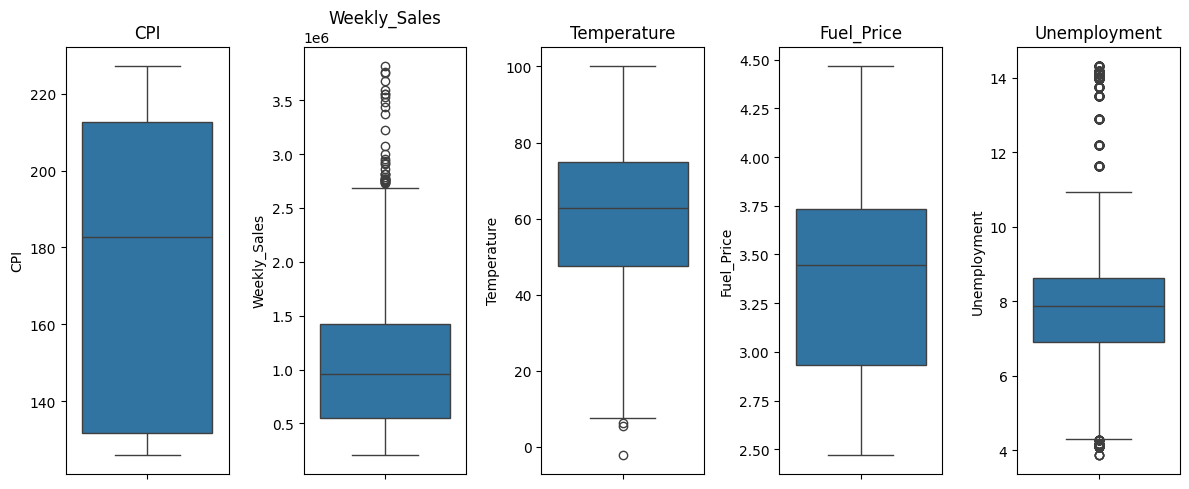

In [15]:
# Store the list of columns
col = ['CPI','Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(col), figsize = (12, 5))

# Create the boxplot with Seaborn
for column, axis in zip(col, axes):
        sns.boxplot(data=df[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
# Removing outliers
for i in col:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper_limit=q3+(1.5*iqr)
  lower_limit=q1-(1.5*iqr)
  df =df[(df[i]<=upper_limit) & (df[i]>=lower_limit)]

In [41]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5839 rows x 8 columns]

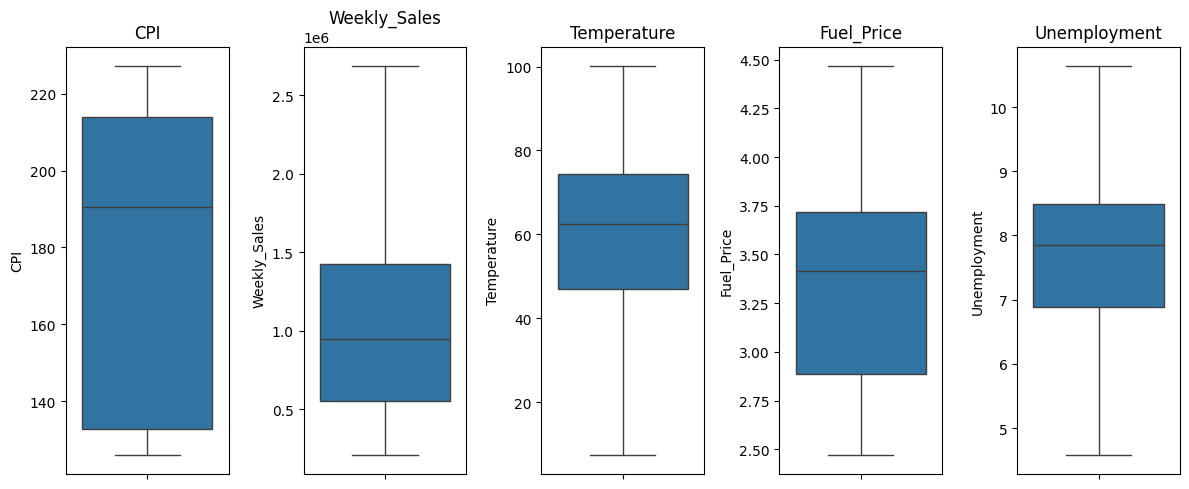

In [42]:
# visualizing after outliers removal
# Store the list of columns
col = ['CPI','Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(col), figsize = (12, 5))

# Create the boxplot with Seaborn
for column, axis in zip(col, axes):
        sns.boxplot(data=df[column], ax=axis)
        axis.set_title(column)
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()

Trying to find the Correlation between Weekly Sales and Umemployment/CPI/Fuelprice/Temperature from overall data without considering store number and date

In [19]:
df[['Weekly_Sales', 'Unemployment']].corr()

Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.073092
Unemployment     -0.073092      1.000000

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

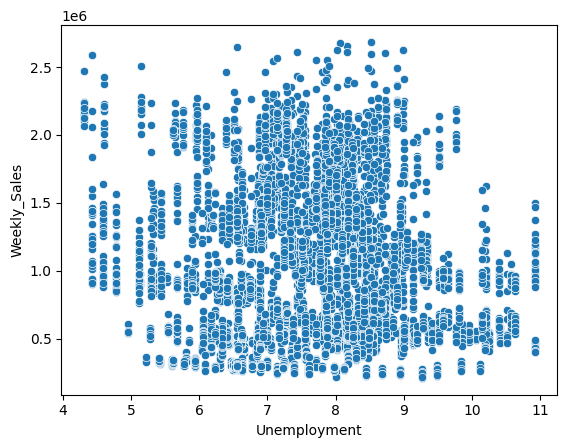

In [20]:
sns.scatterplot(data=df, x="Unemployment", y="Weekly_Sales")

Low Correlation is seen between Unemployment and Weeklysales. Sales is declined only above Unemployment of 10

In [21]:
df[['Weekly_Sales', 'CPI']].corr()

Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.082977
CPI              -0.082977  1.000000

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

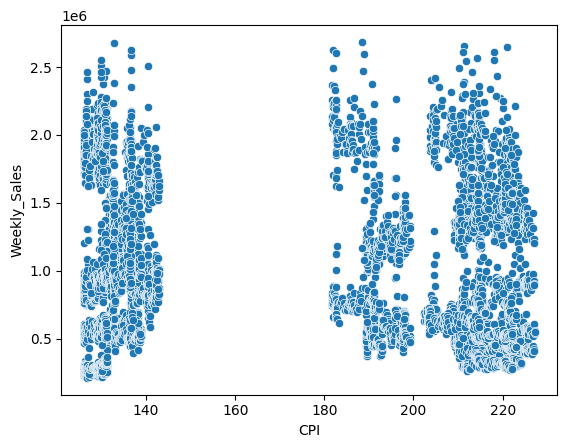

In [22]:
sns.scatterplot(data=df, x="CPI", y="Weekly_Sales")

No Correlation is seen between CPI and Weeklysales. Sale rate seen at almost all CPI ranges. No sales is seen when CPI is above 140 and below 180

In [23]:
df[['Weekly_Sales', 'Temperature']].corr()

Weekly_Sales  Temperature
Weekly_Sales      1.000000    -0.041686
Temperature      -0.041686     1.000000

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

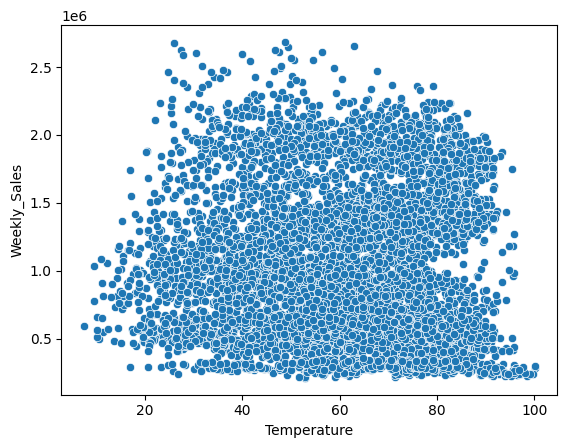

In [24]:
sns.scatterplot(data=df, x="Temperature", y="Weekly_Sales")

Low sales is seen when temperature is below 20 and above 90

In [25]:
df[['Weekly_Sales', 'Fuel_Price']].corr()

Weekly_Sales  Fuel_Price
Weekly_Sales      1.000000    0.019664
Fuel_Price        0.019664    1.000000

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

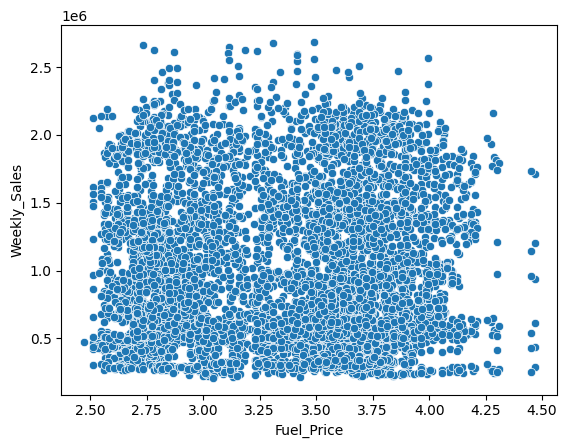

In [26]:
sns.scatterplot(data=df, x="Fuel_Price", y="Weekly_Sales")

1. Sales is lower than 2000000 when Fuel price is 4.25-4.50 and less number of sales were recorded
2. For rest of the fuel price no change in sales
3. Less number of sales seen above Fuel price 4

In [27]:
df[['Weekly_Sales', 'Unemployment']].corr()

Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.073092
Unemployment     -0.073092      1.000000

No good correlation is seen from overall data. Need to check store specific data.

In [28]:
# Find overall weekly sales data with respect to store numbers
Sales = df.groupby(['Store'])[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending = False).reset_index()
Sales.head()

Store  Weekly_Sales
0     20  2.800237e+08
1     14  2.761276e+08
2      2  2.687221e+08
3     13  2.682025e+08
4     10  2.556789e+08

In [29]:
Sales.tail()

Store  Weekly_Sales
40     44   43293087.84
41     33   37160221.96
42     28   21106767.80
43     12   16386710.79
44     38    7347378.89

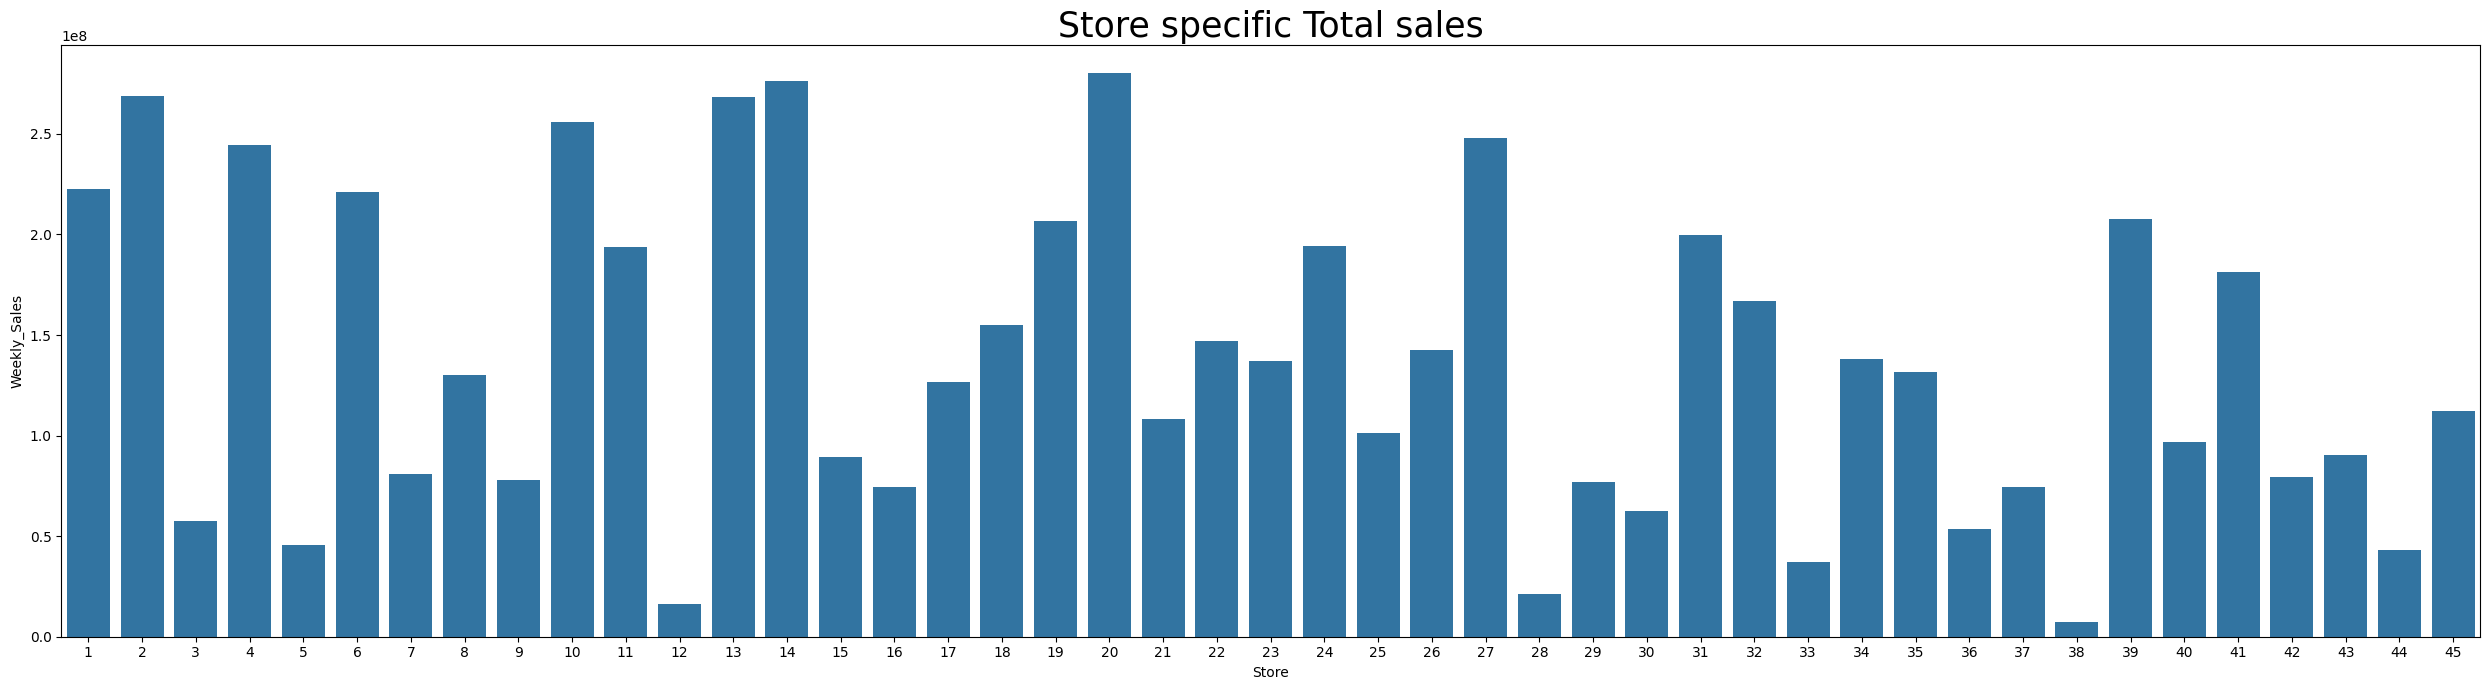

In [30]:
#visualize store specific sales data
plt.figure(figsize=[25,7])
sns.barplot(Sales, x="Store", y="Weekly_Sales")
plt.title('Store specific Total sales', size=25)
# Show the plot
plt.tight_layout()
plt.show()

In [31]:
2.800237e+08-1741896.51

278281803.49

Observation from Total Sales vs Stores:
1. Store 38 has poor sales
2. Store 20 has highest sales
3. The difference between store 20 & store 38: 278281803.49
4. Worst affected stores are store number in order: 38, 12, 28

In [32]:
# Find overall weekly sales data with respect to store numbers vs holiday flag
Sales_holiday = df.groupby(['Store', 'Holiday_Flag'])[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending = False).reset_index()
Sales_holiday.head()

Store  Holiday_Flag  Weekly_Sales
0     20             0  2.632513e+08
1     14             0  2.578435e+08
2     13             0  2.527026e+08
3      2             0  2.479294e+08
4     10             0  2.404315e+08

In [33]:
Sales_holiday.info() #created dataframe including holiday flag and weekly sales vs stores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         90 non-null     int64  
 1   Holiday_Flag  90 non-null     int64  
 2   Weekly_Sales  90 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.2 KB


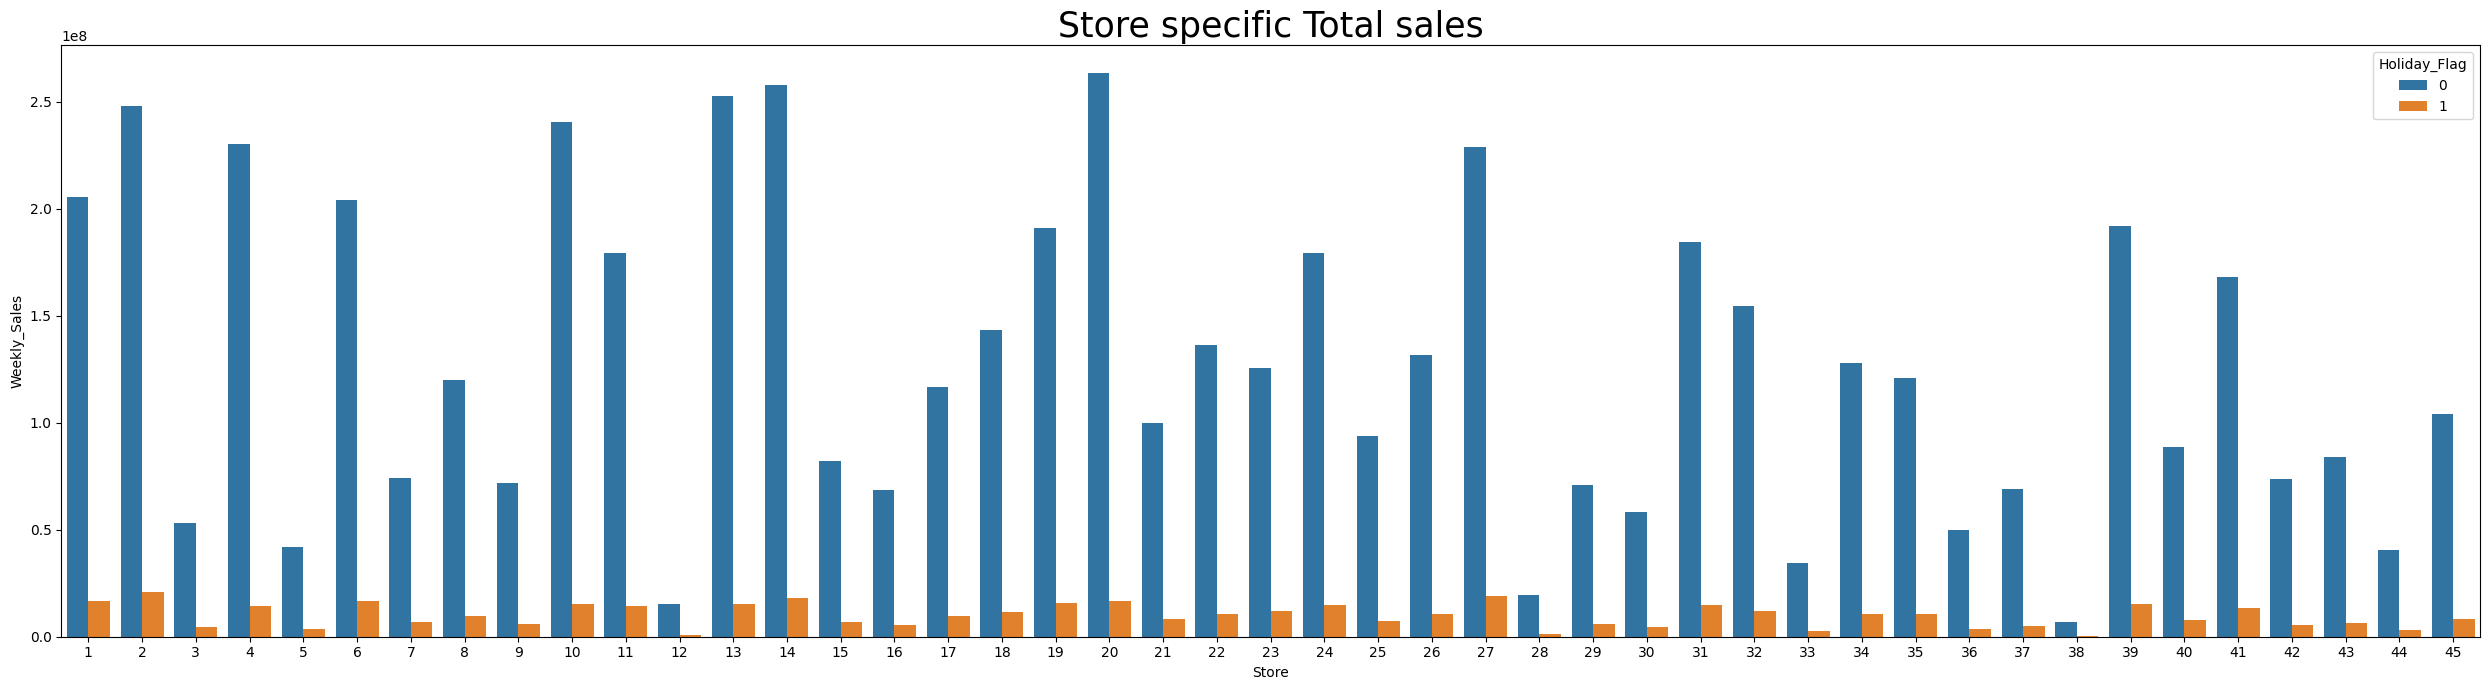

In [34]:
#Visualizing the sales vs holiday flag
plt.figure(figsize=[25,7])
sns.barplot(Sales_holiday, x = 'Store', y = 'Weekly_Sales', hue = 'Holiday_Flag')
plt.title('Store specific Total sales', size=25)
plt.tight_layout()
plt.show()

Holiday impacts sales a lot. To understand this data further need to analyze the number of working days vs holidays

In [35]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5508
1     409
Name: count, dtype: int64

In [36]:
402/(5437+402)*100

6.884740537763316

In [37]:
df_HF_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
df_HF_Sales

Holiday_Flag  Weekly_Sales
0             0  5.704333e+09
1             1  4.452825e+08

In [38]:
4.369580e+08/(4.369580e+08+5.614771e+09)*100

7.2203828029972925

Conclusion from the holidays vs sales
1. Holidays being 7% of total days, doesnt get qualified to compare with working days
2. Sales on Holidays being 7% of total sales, doesnt get qualified to compare with working days
3. Sales vs holidays being around 7% conveys, confirms no impact on sales vs holidays

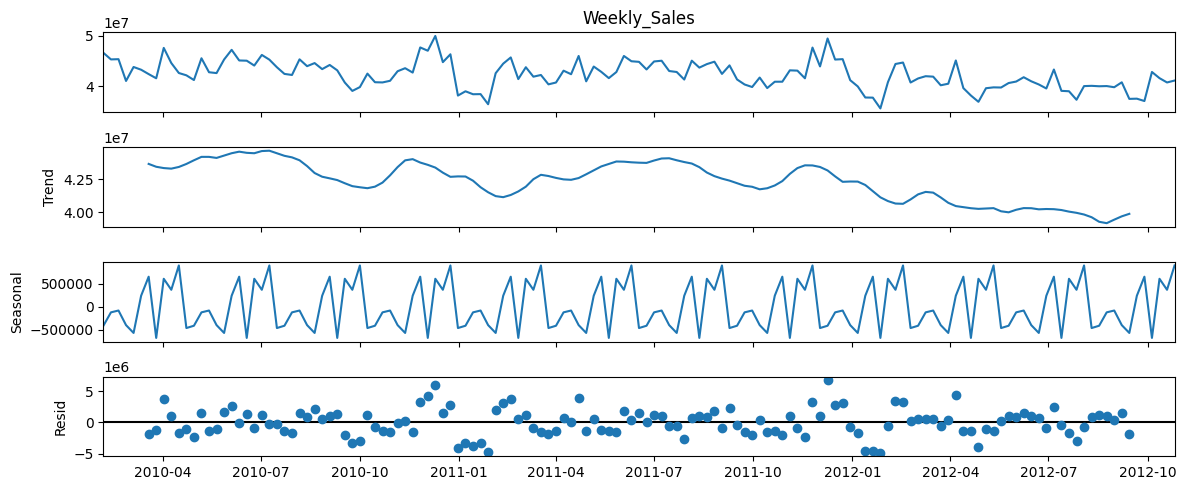

In [44]:
# Weekly Sales
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index

from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=12)

# Change default figsize
plt.rc("figure",figsize=(12,5))
sales_decomposition.plot()
plt.show()

Observation:
1. Sales trend peek was seen in 2010-07 , 2010-12, 2011-07, 2011-12
2. Declined sales trend was seen from 2010-07 till 2010-10 and repeated from 2010-11 till 2011-02, 2011-07 till 2011-10
3. Decline in sales trend seen from 2012-01 till 2012-10
4. the pattern of sales trend peek and decline were seen in same way for 2010 & 2011, but declined from beginning of 2012

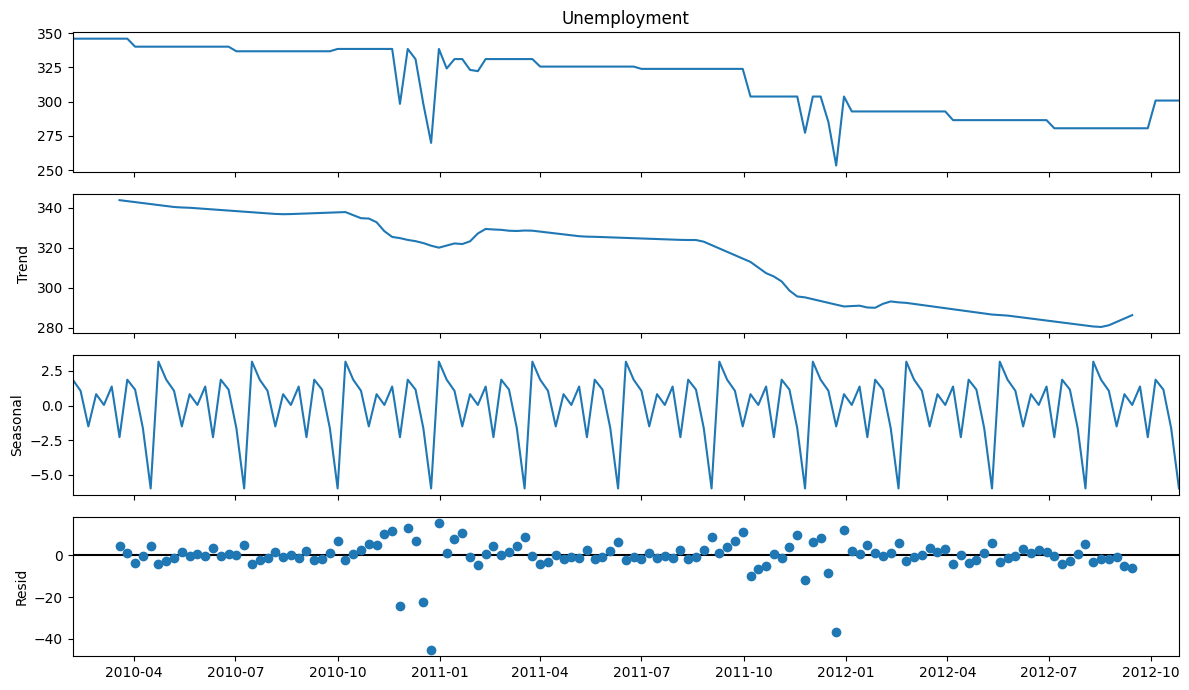

In [45]:
# Unemployment
df_stores_unemployment =df.groupby('Date')['Unemployment'].sum().reset_index()
df_stores_unemployment.set_index('Date',inplace=True) # Setting the Date column as an Index

from statsmodels.tsa.seasonal import seasonal_decompose
unemployment_decomposition=seasonal_decompose(df_stores_unemployment['Unemployment'],period=12)

# Change default figsize
plt.rc("figure",figsize=(12,7))
unemployment_decomposition.plot()
plt.show()

Observation:
1. Unemployment trend declined from 2010-04 till 2012-10
2. Much decline in Unemployment was seen from 2011-10 till 2011-12

In [46]:
# Creating the dataframe which is having top 5 stores that can have highest weekly sales
top5_Sale_Stores = df_stores_sales.sort_values(by='Weekly_Sales',ascending=False).head(5)
# Looking the dataframe
top5_Sale_Stores

Weekly_Sales
Date                    
2010-12-10   49970584.44
2011-12-09   49469192.73
2010-11-26   47692574.72
2011-11-25   47665854.55
2010-04-02   47601520.01

In [48]:
# Creating the dataframe which is having bottom 5 stores that can have highest weekly sales
bottom5_Sale_Stores = df_stores_sales.sort_values(by='Weekly_Sales',ascending=False).tail(5)
# Looking the dataframe
bottom5_Sale_Stores

Weekly_Sales
Date                    
2012-07-27   37312022.63
2012-09-28   37060256.31
2012-04-27   36904928.25
2011-01-28   36423831.94
2012-01-27   35593306.52

In [52]:
#finding mean difference between top 5 and bottom5 performing stores
mean_difference = top5_Sale_Stores.mean() - bottom5_Sale_Stores.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: Weekly_Sales    11821076.16
dtype: float64


In [53]:
# trying to find the significant differences between top and worst performing stores of 5.
from scipy.stats import ttest_ind # Importing the ttest_ind.. this helps us to compare mean between the two independent groups
top_sales = top5_Sale_Stores['Weekly_Sales']
worst_sales = bottom5_Sale_Stores['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [54]:
# Interpret results
if p_value < 0.05:
    print("There is a significant difference between top5-performing and worst5-performing stores. Its P-value: {p_value}")

else:
    print(f"There is no significant difference between top5-performing and worst5-performing stores. Its P-value: {p_value}")


There is a significant difference between top5-performing and worst5-performing stores. Its P-value: {p_value}


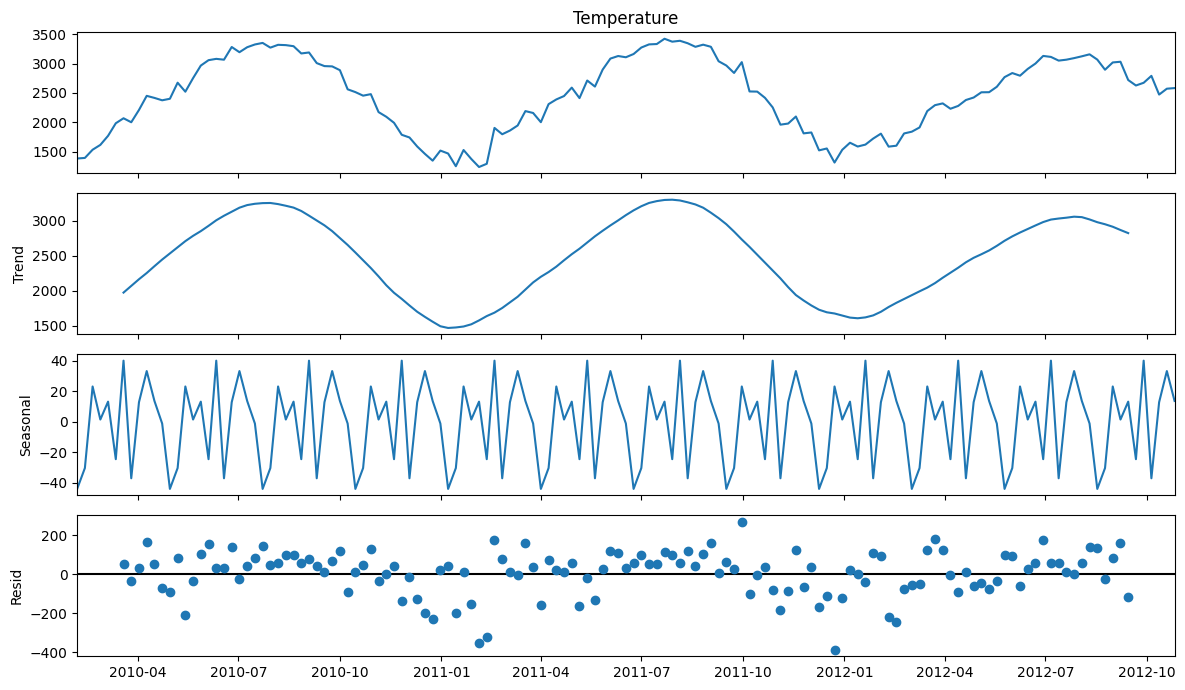

In [55]:
# Temperature
df_stores_temp =df.groupby('Date')['Temperature'].sum().reset_index()
df_stores_temp.set_index('Date',inplace=True) # Setting the Date column as an Index

from statsmodels.tsa.seasonal import seasonal_decompose
temp_decomposition=seasonal_decompose(df_stores_temp['Temperature'],period=12)

# Change default figsize
plt.rc("figure",figsize=(12,7))
temp_decomposition.plot()
plt.show()

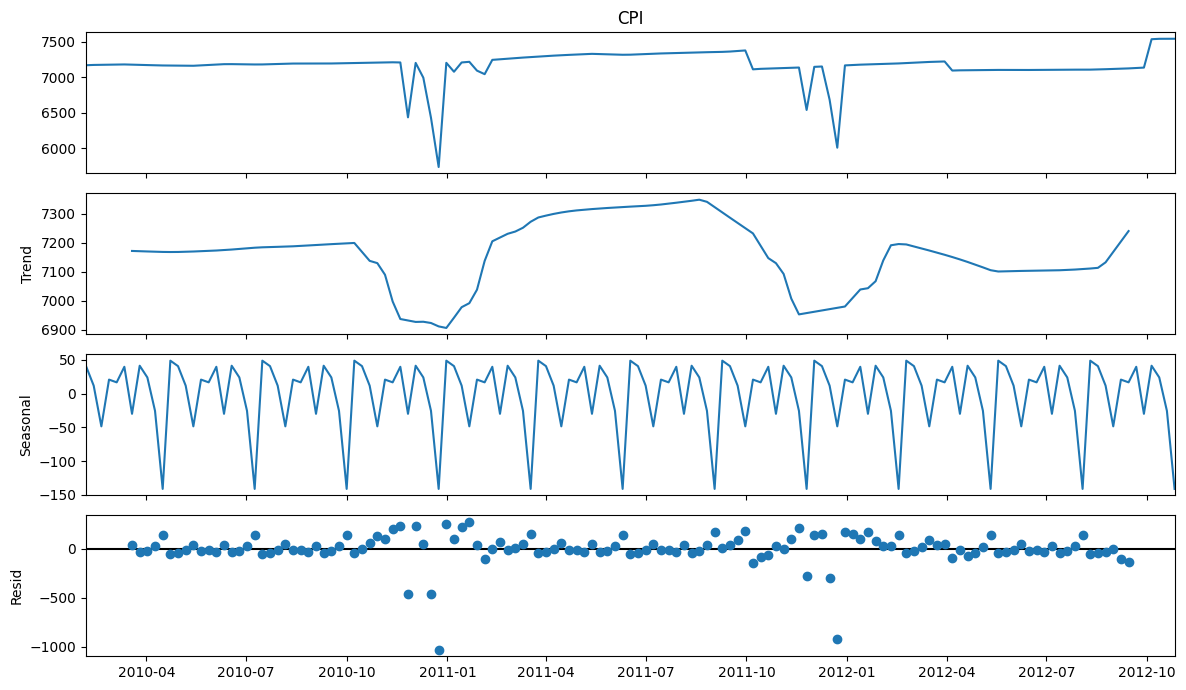

In [56]:
# CPI
df_stores_cpi =df.groupby('Date')['CPI'].sum().reset_index()
df_stores_cpi.set_index('Date',inplace=True) # Setting the Date column as an Index

from statsmodels.tsa.seasonal import seasonal_decompose
cpi_decomposition=seasonal_decompose(df_stores_cpi['CPI'],period=12)

# Change default figsize
plt.rc("figure",figsize=(12,7))
cpi_decomposition.plot()
plt.show()

In [57]:
df_stores_sales

Weekly_Sales
Date                    
2010-02-05   46619845.70
2010-02-12   45317630.91
2010-02-19   45363033.79
2010-02-26   41043557.90
2010-03-05   43813776.69
...                  ...
2012-09-28   37060256.31
2012-10-05   42823075.29
2012-10-12   41600039.67
2012-10-19   40743817.45
2012-10-26   41125802.72

[143 rows x 1 columns]

In [58]:
# Performing statistical test (adfuller test) to understand if there is stationary in sales data.
import statsmodels.api as sm

def adf_test(dataset):
  pvalue = sm.tsa.stattools.adfuller(dataset)[1]
  if pvalue < 0.05:
    print('Reject the null hypothesis. The data is stationary')
  else:
    print('Failed to reject the null hypothesis. The data is not stationary')

adf_test(df_stores_sales['Weekly_Sales'])

Failed to reject the null hypothesis. The data is not stationary


It means that sales data is changing with respect to the time

# **Simple Forecasting Methods**

In [59]:
from sklearn.metrics import (

    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print all metrics
def performance(actual, predicted):
  print('MAE : ', round(mae(actual, predicted),3))
  print('RMSE : ', round(mse(actual, predicted)**0.5,3))
  print('MSE : ' ,round(mse(actual, predicted),3))
  print('MAPE : ' ,round(mape(actual, predicted),3))

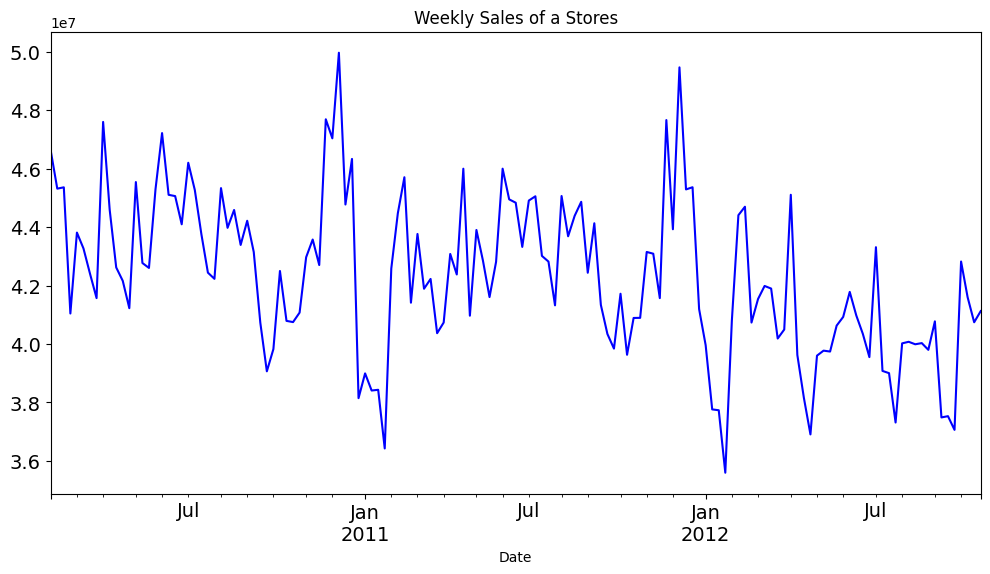

In [60]:
df_stores_sales.Weekly_Sales.plot(figsize=(12,6), title= 'Weekly Sales of a Stores', fontsize=14, color = 'blue')
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

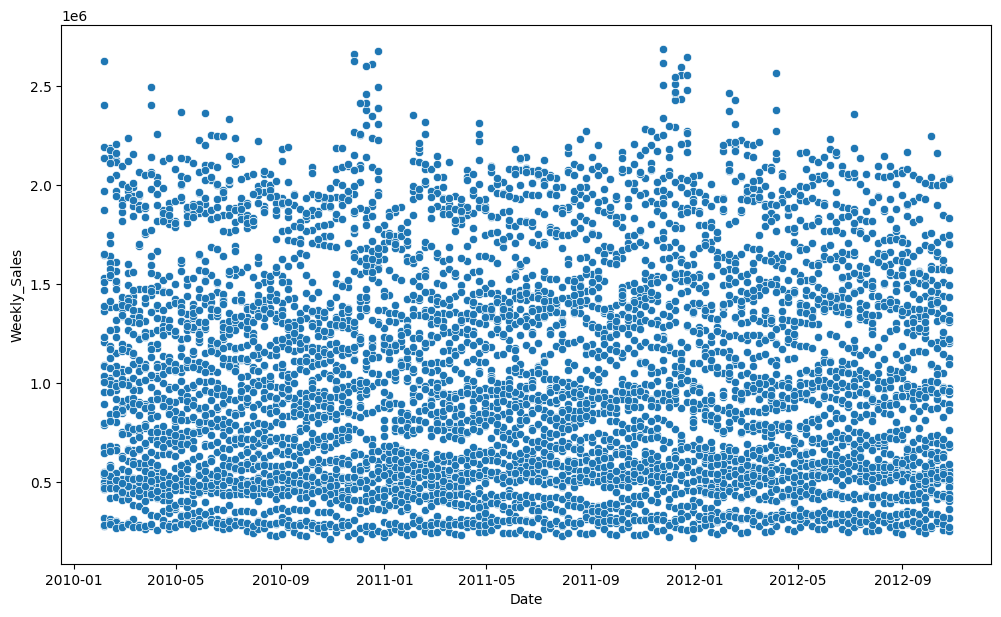

In [61]:
sns.scatterplot(data=df, x="Date", y="Weekly_Sales")

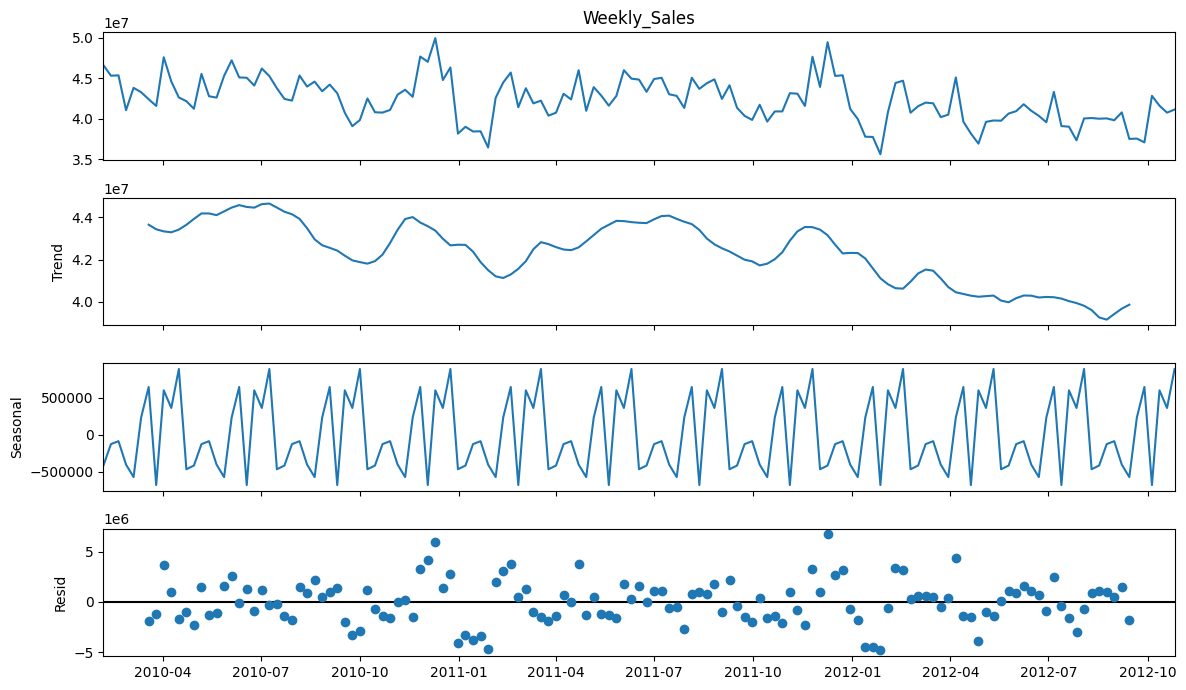

In [62]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=12)

plt.rc("figure",figsize=(12,7))
decomposition.plot()
plt.show()

In [64]:
# as the data is non stationary we should apply detrend or transformation


In [68]:
#Mean transformation
rolling_mean=df_stores_sales.rolling(window=12).mean()
rolling_mean_detrened=df_stores_sales-rolling_mean

rolling_mean_detrened.head(15)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09           NaN
2010-04-16           NaN
2010-04-23 -1.704231e+06
2010-04-30 -2.190104e+06
2010-05-07  2.108574e+06
2010-05-14 -4.470031e+05

<Axes: title={'center': 'original data'}, xlabel='Date'>

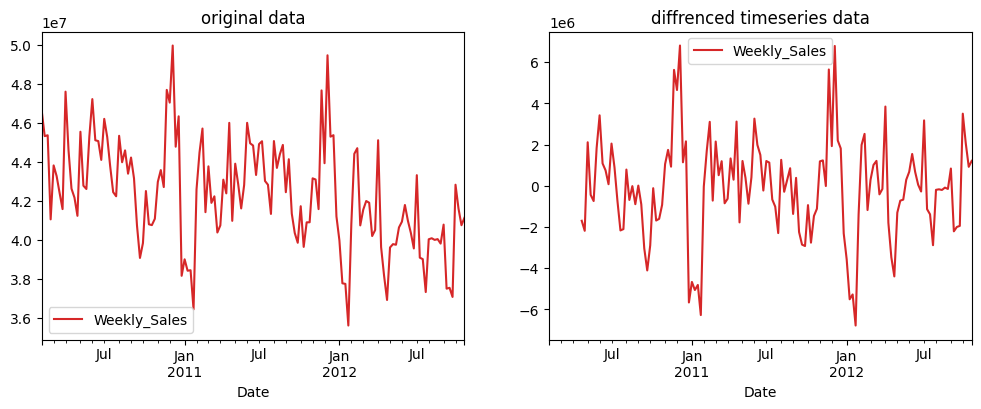

In [69]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrened.plot(figsize=(12,4),color='tab:red',
                           title="diffrenced timeseries data",
                           ax=ax1)

ax2=plt.subplot(1,2,1)
df_stores_sales.plot(figsize=(12,4),color='tab:red',title="original data",ax=ax2)

In [70]:
detrended_data=rolling_mean_detrened.dropna()

In [71]:
detrended_data

Weekly_Sales
Date                    
2010-04-23 -1.704231e+06
2010-04-30 -2.190104e+06
2010-05-07  2.108574e+06
2010-05-14 -4.470031e+05
2010-05-21 -7.456222e+05
...                  ...
2012-09-28 -1.952941e+06
2012-10-05  3.497825e+06
2012-10-12  2.058243e+06
2012-10-19  9.160374e+05
2012-10-26  1.206007e+06

[132 rows x 1 columns]

In [72]:
m=detrended_data.rolling(window=12).mean()
s=detrended_data.rolling(window=12).std()

Text(0.5, 1.0, 'detrended data with mean and std line')

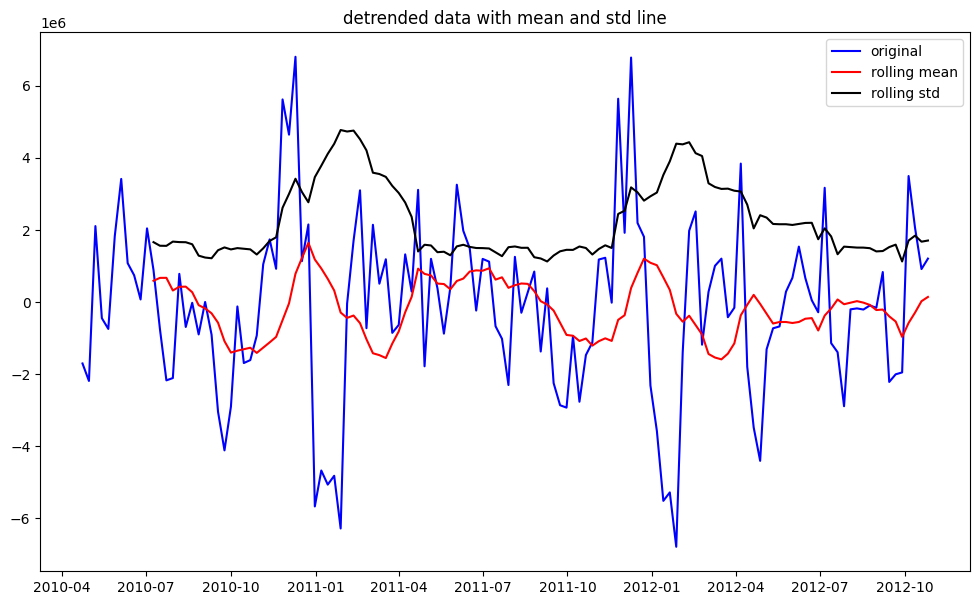

In [73]:
plt.plot(detrended_data,color='blue',label='original')
plt.plot(m,color='red',label='rolling mean')
plt.plot(s,color="black",label="rolling std")
plt.legend(loc='best')
plt.title("detrended data with mean and std line")

rolling mean and weekly sales are almost matching, but spikes are not captured in mean.

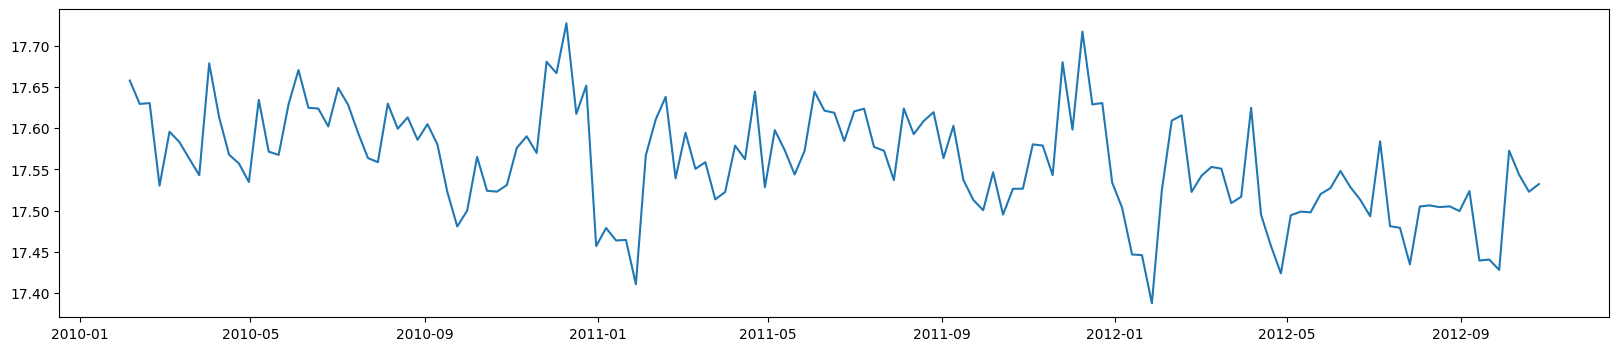

In [150]:
df_log = np.log(df_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

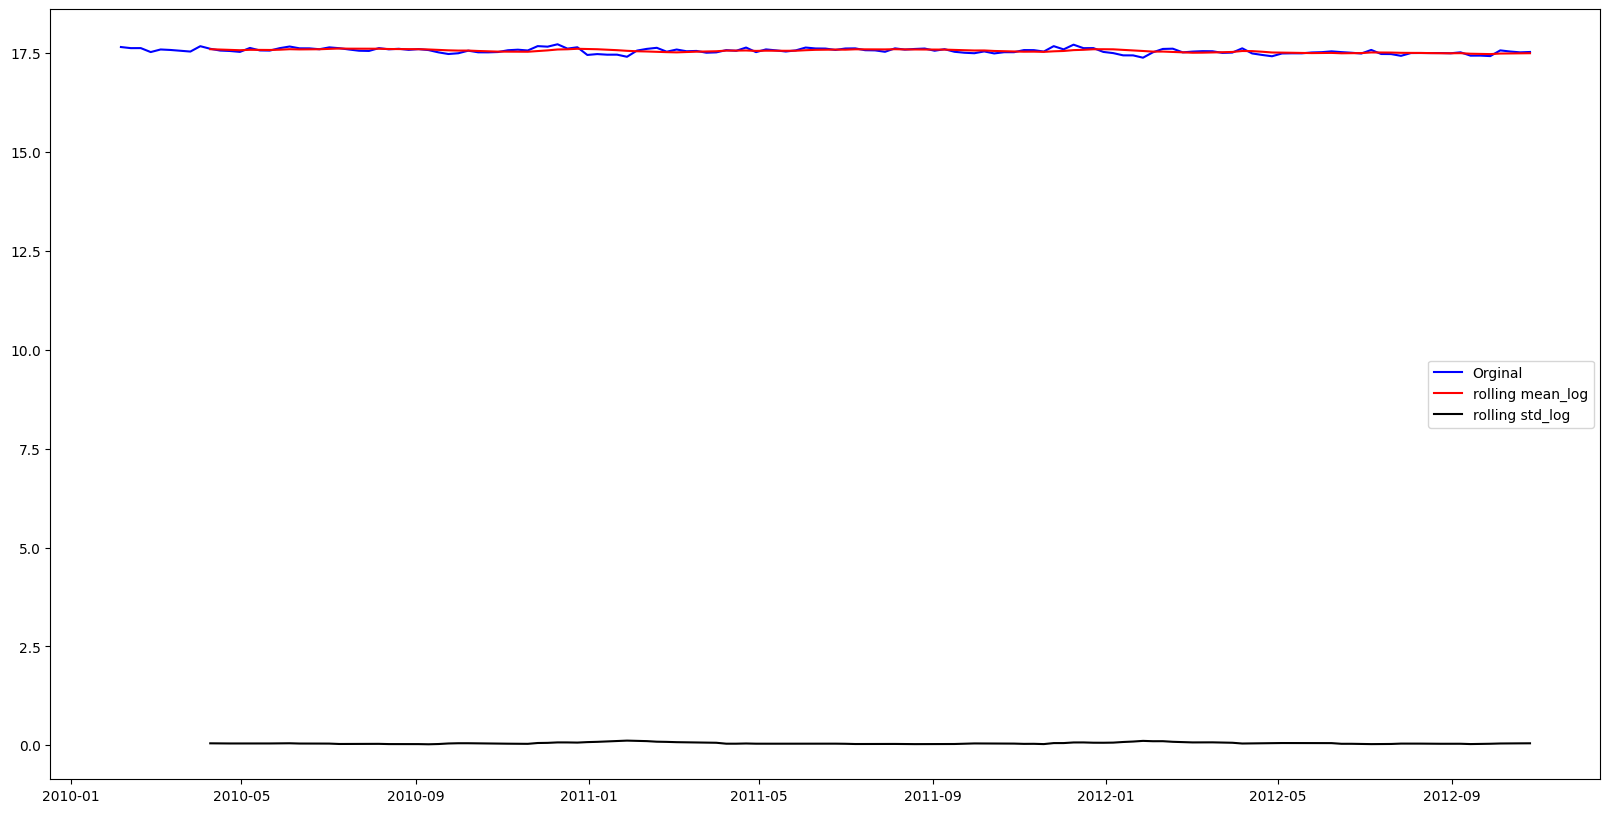

In [152]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,10))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [153]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.010962
2010-04-16     -0.025486
2010-04-23     -0.029080
2010-04-30     -0.041952
2010-05-07      0.047243
2010-05-14     -0.013134
2010-05-21     -0.015530
2010-05-28      0.039219
2010-06-04      0.067997
2010-06-11      0.027608
2010-06-18      0.025597

In [154]:
df_new.dropna(inplace = True) # dropping the nan values

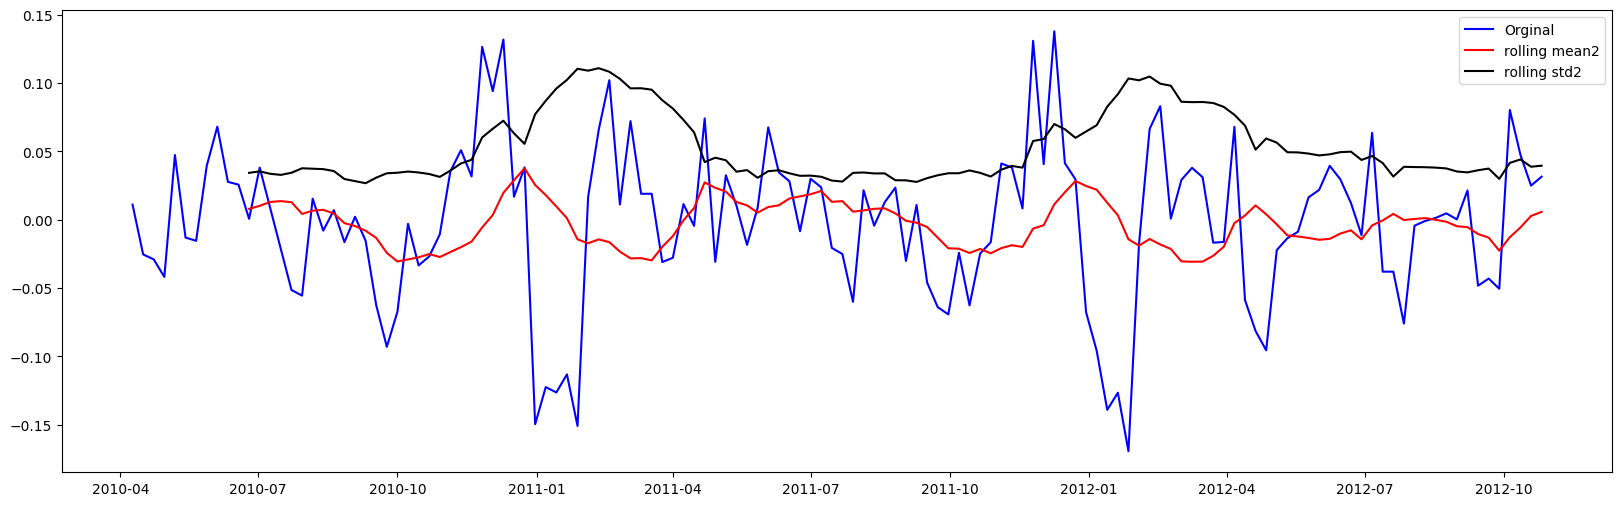

In [155]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [157]:
adf_test(df_new['Weekly_Sales']) # Checking the Data stationarity again after the log transformation


Reject the null hypothesis. The data is stationary


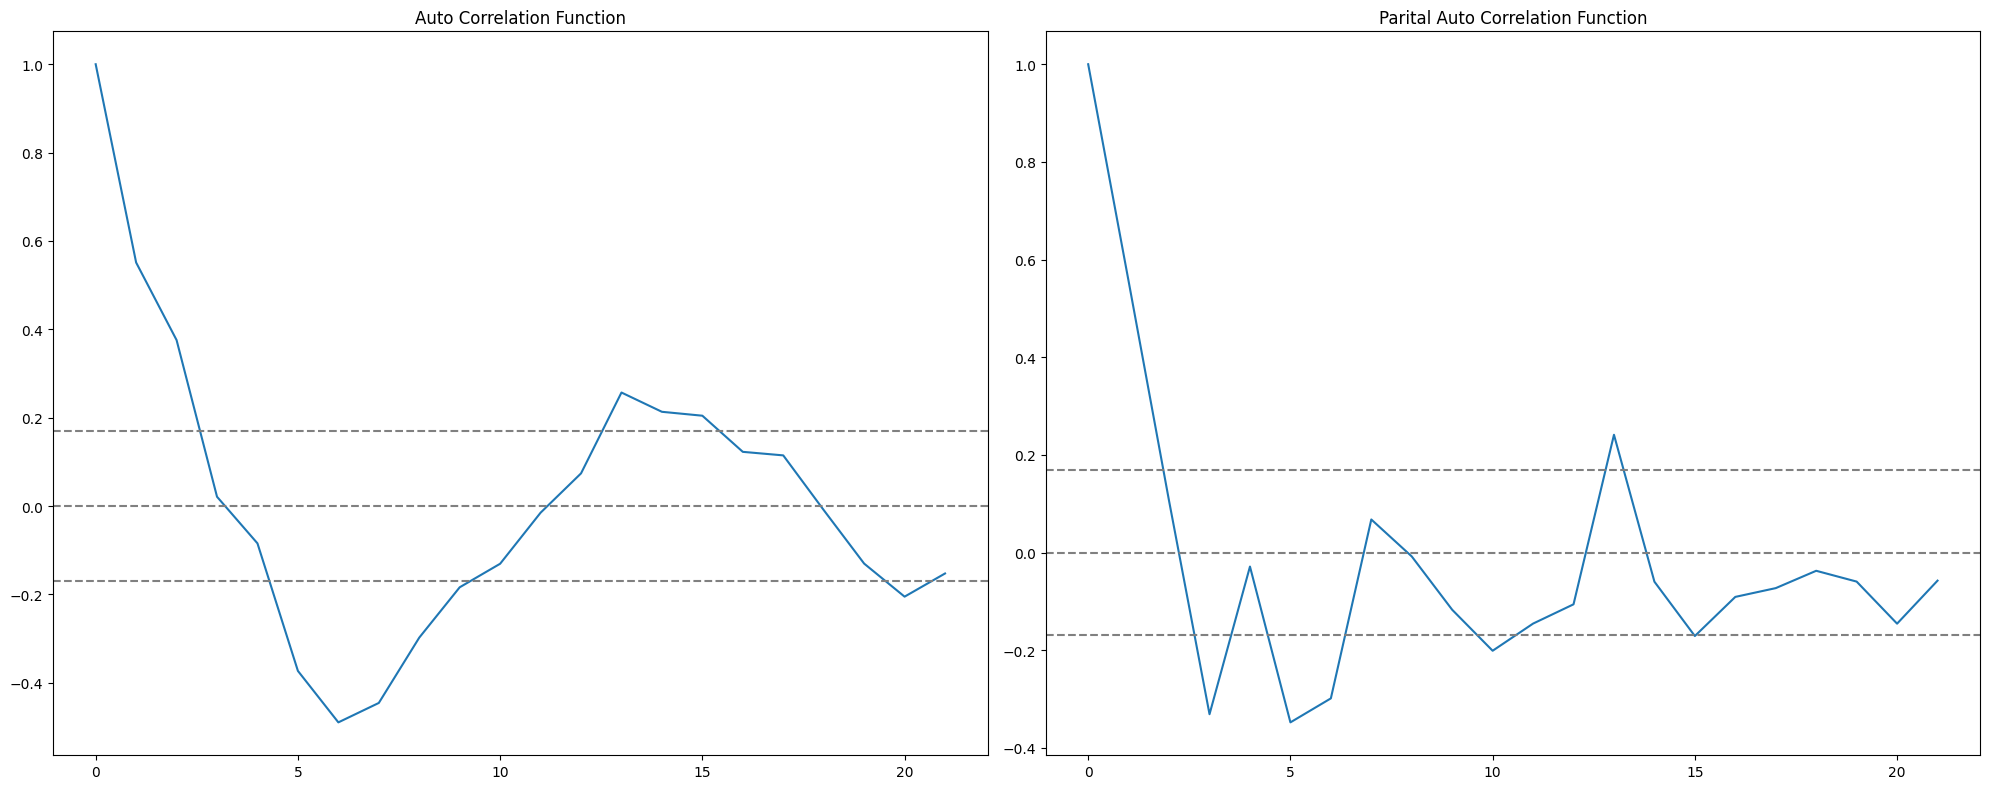

In [158]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [159]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

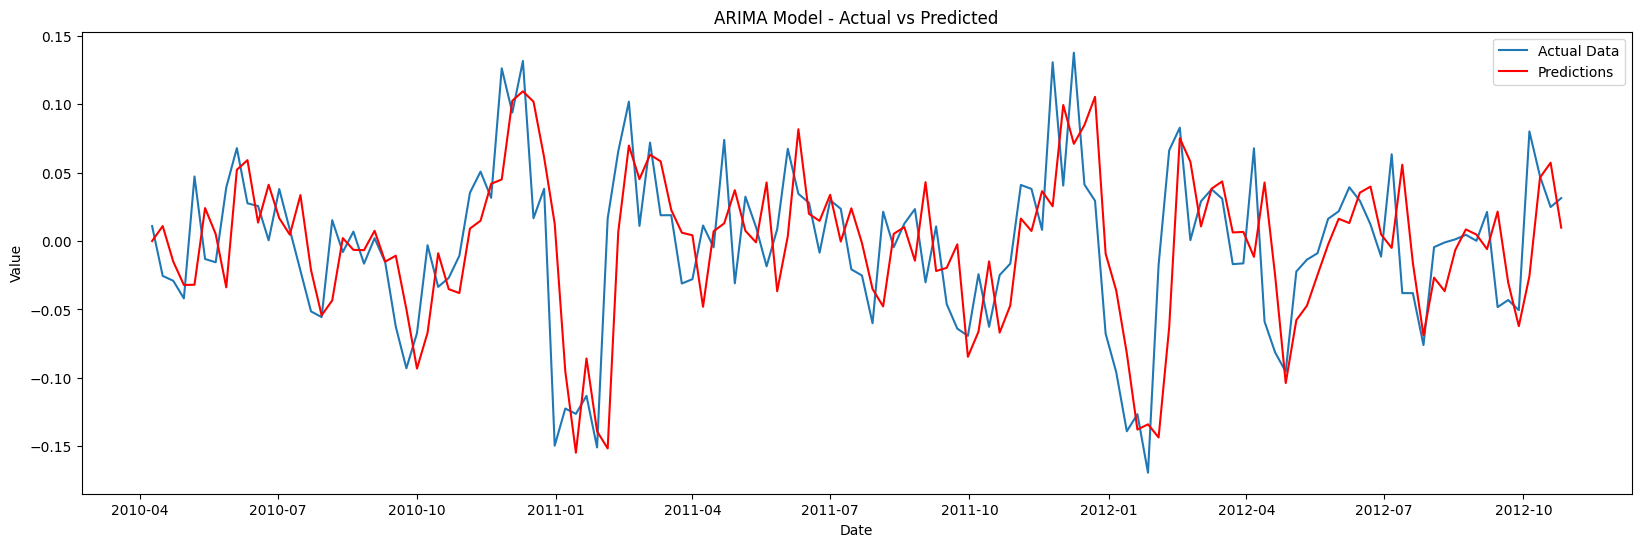

In [160]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [161]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.0023295402009278097


In [162]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.04826531053383796


Store Wise Predictions Store 1 Sales Forecast

In [163]:
# Creating a new data frame for store 1 sales forecast
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [164]:
store1_sales.set_index('Date',inplace=True) # Setting the date column as an index
adf_test(store1_sales['Weekly_Sales'])

Reject the null hypothesis. The data is stationary


In [165]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

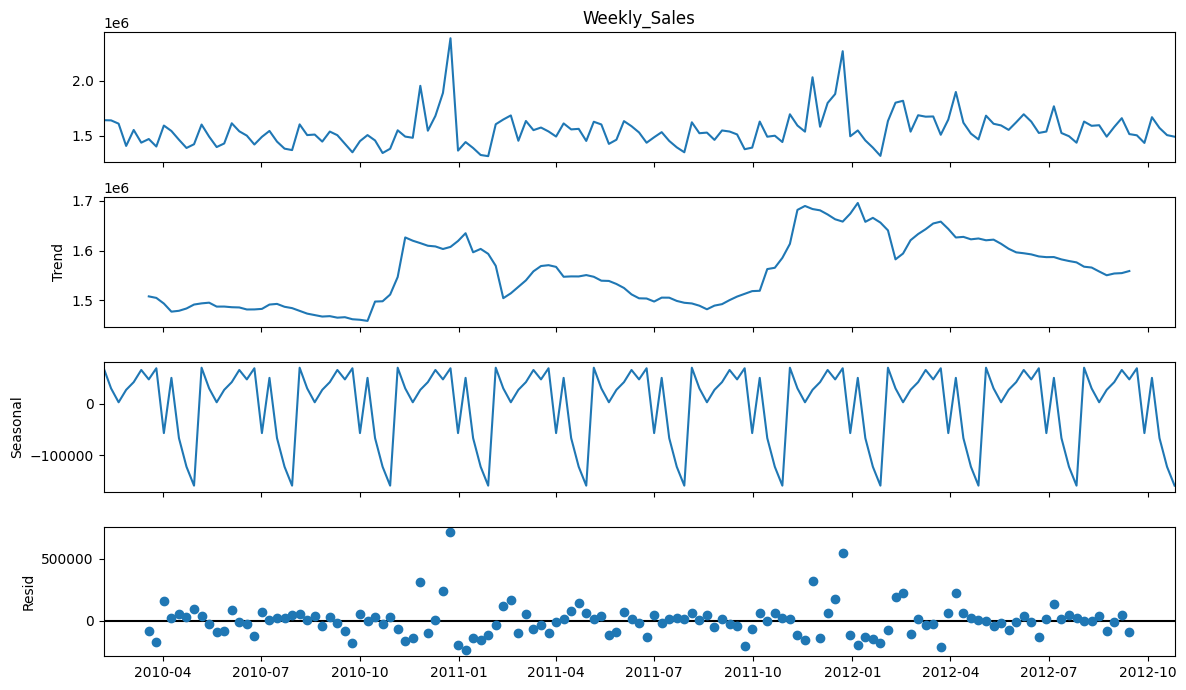

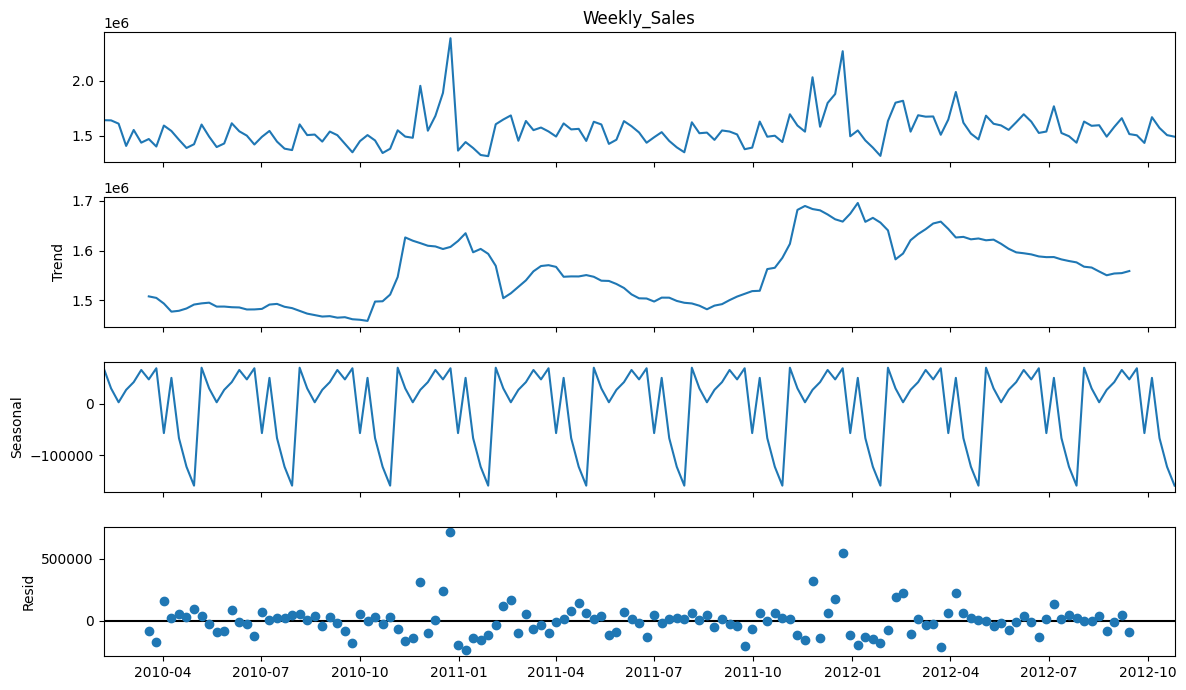

In [166]:
decomposition.plot()
plt.rc("figure",figsize=(12,7))
decomposition.plot()
plt.show()

In [167]:
mean1=store1_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store1_sales.rolling(window=10).std() # Creating the Rolling standard deviation

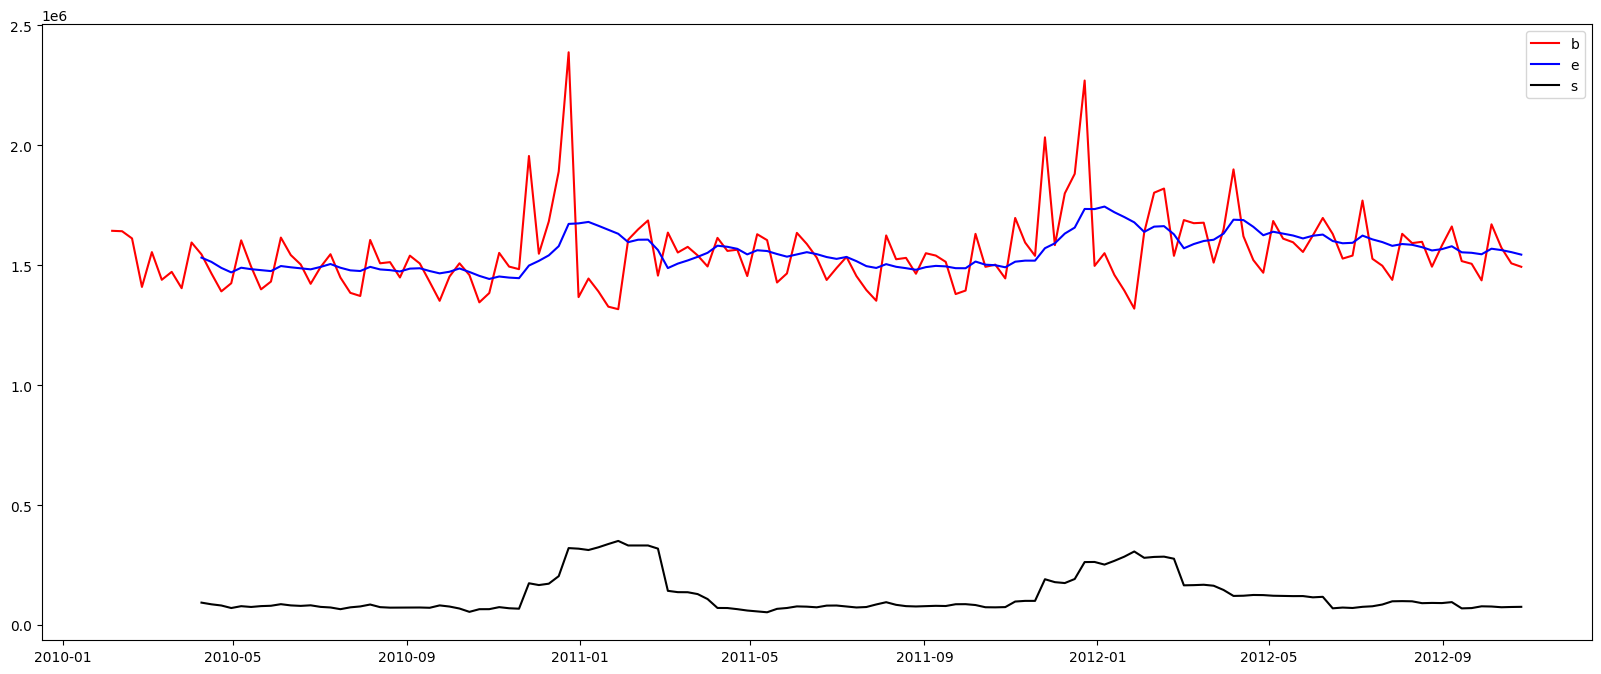

In [168]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

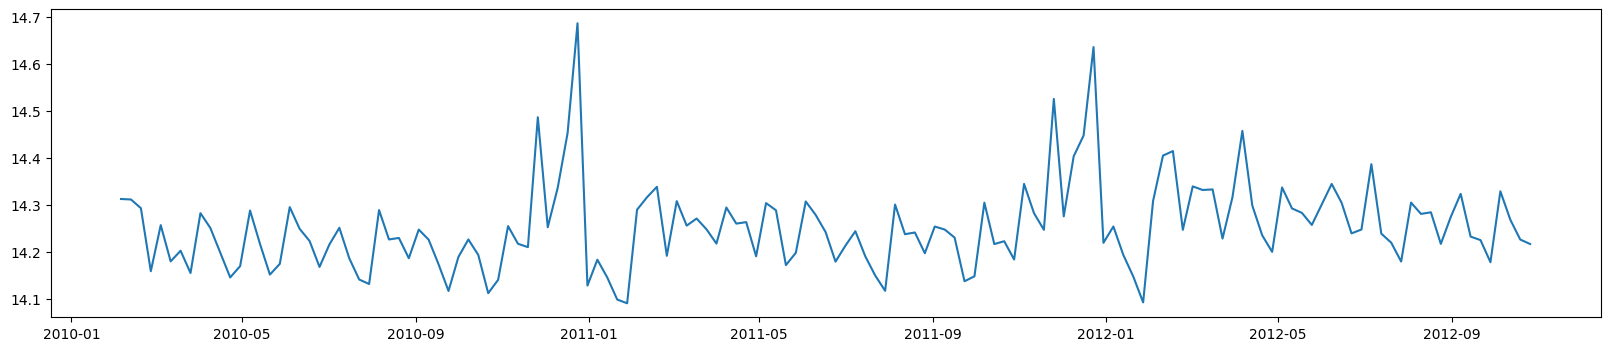

In [169]:
df_log = np.log(store1_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

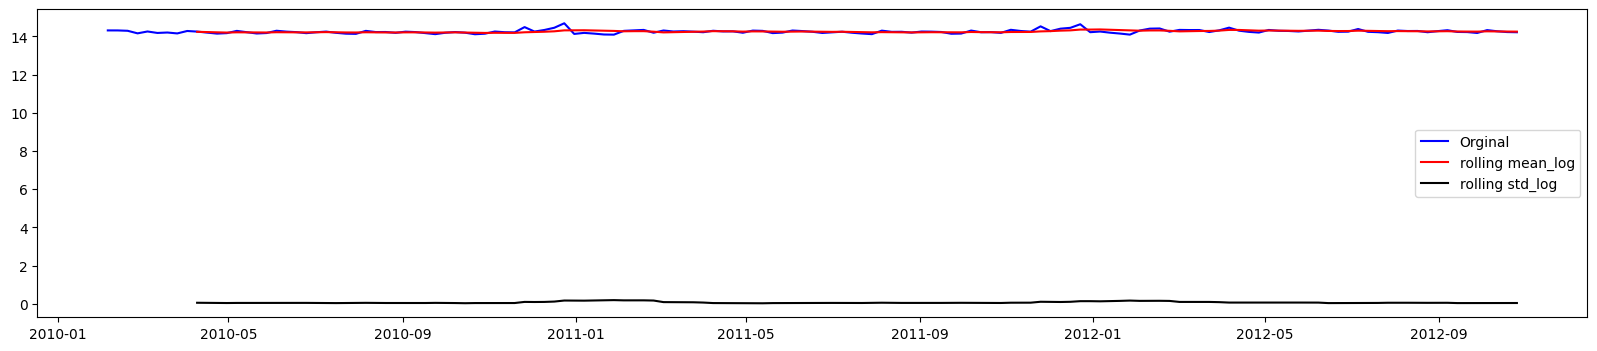

In [170]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [171]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.010483
2010-04-16     -0.030797
2010-04-23     -0.066599
2010-04-30     -0.030243
2010-05-07      0.075080
2010-05-14      0.008205
2010-05-21     -0.054380
2010-05-28     -0.028705
2010-06-04      0.077831
2010-06-11      0.034957
2010-06-18      0.011929

In [172]:
df_new.dropna(inplace = True) # dropping the nan values

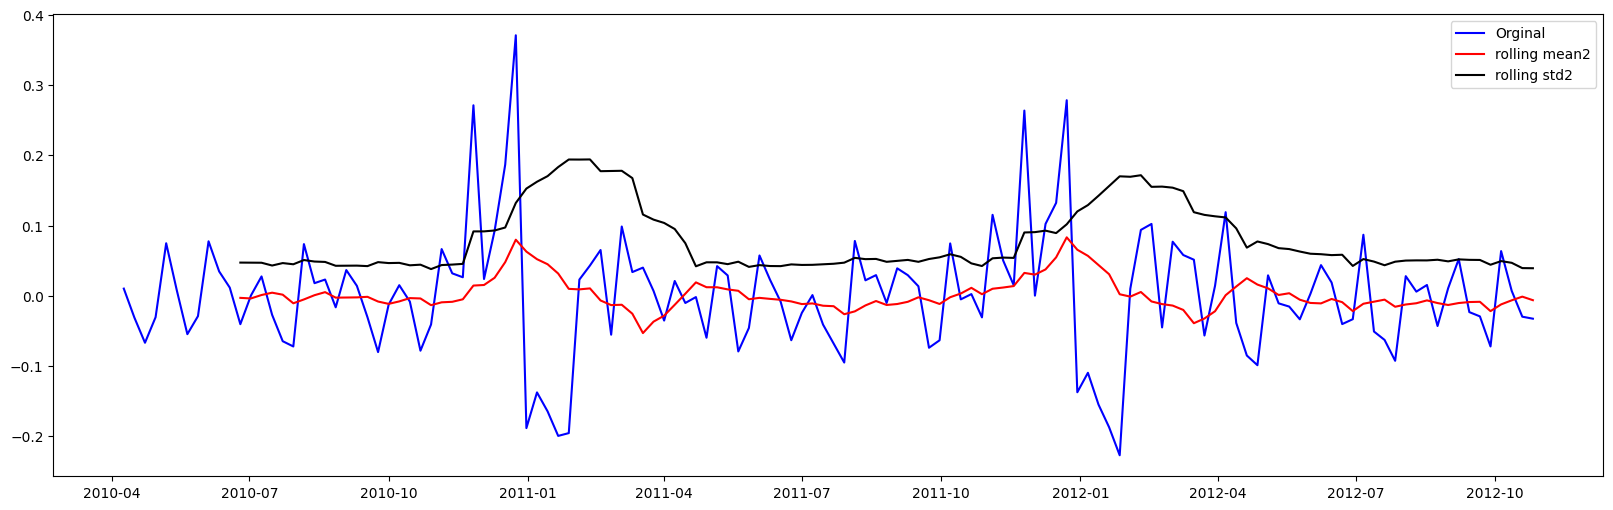

In [173]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [174]:
adf_test(df_new['Weekly_Sales']) # Checking the Data stationarity again after the log transformation

Reject the null hypothesis. The data is stationary


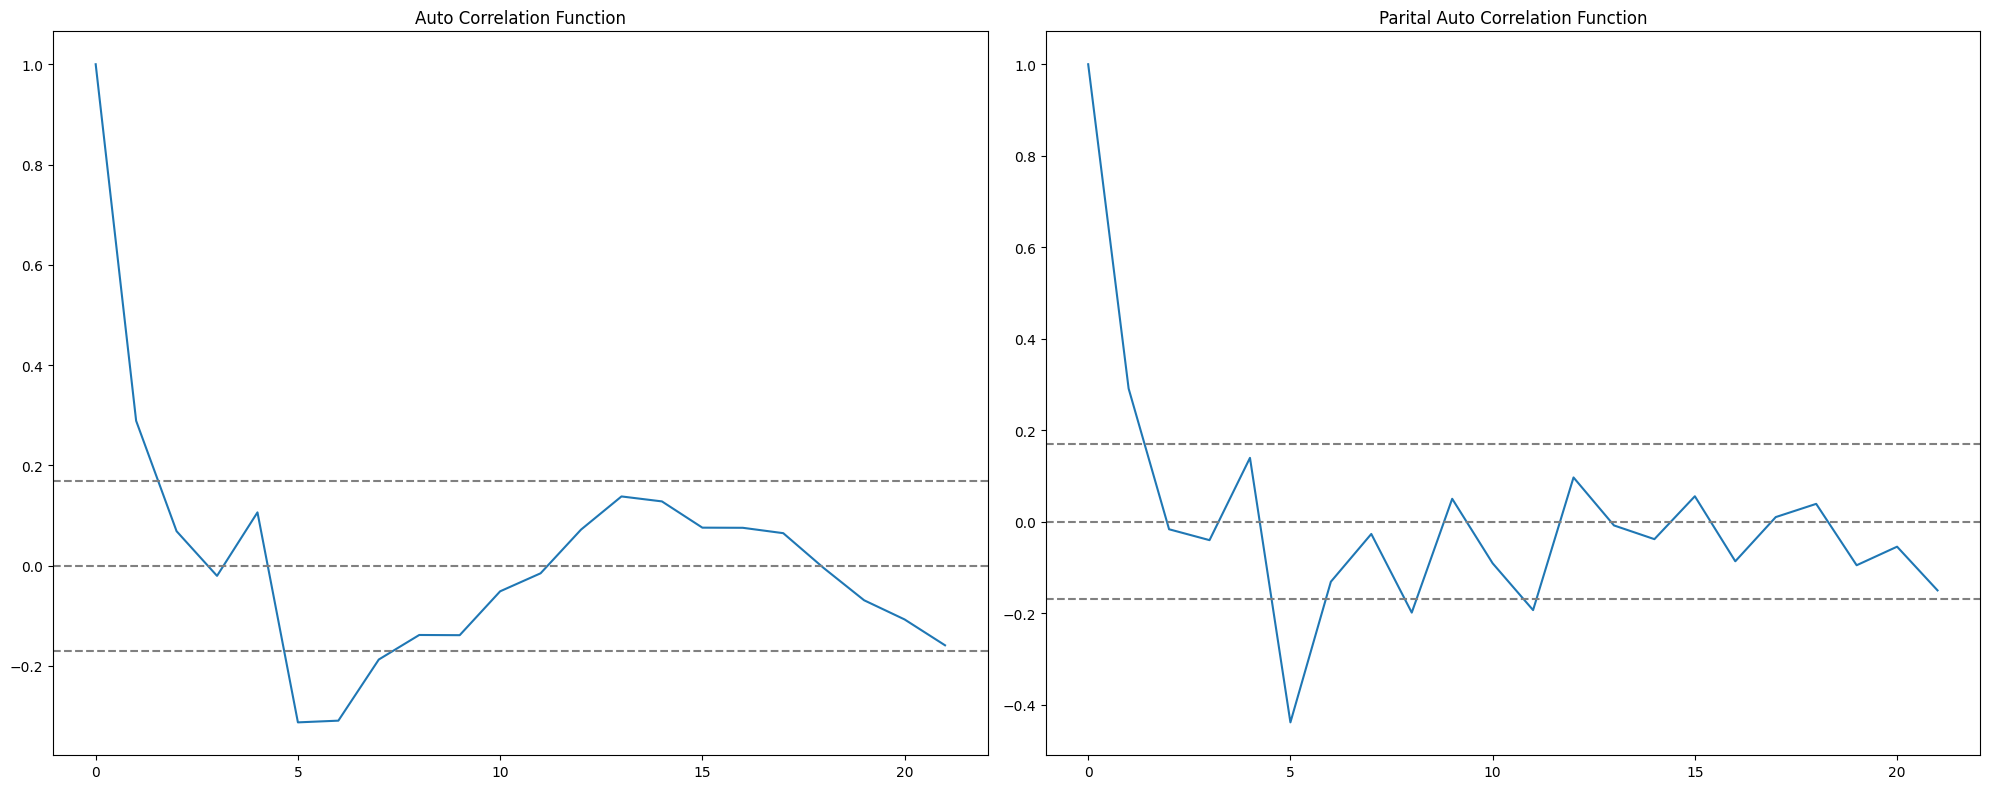

In [175]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [176]:
p, d, q = 2, 1, 2  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

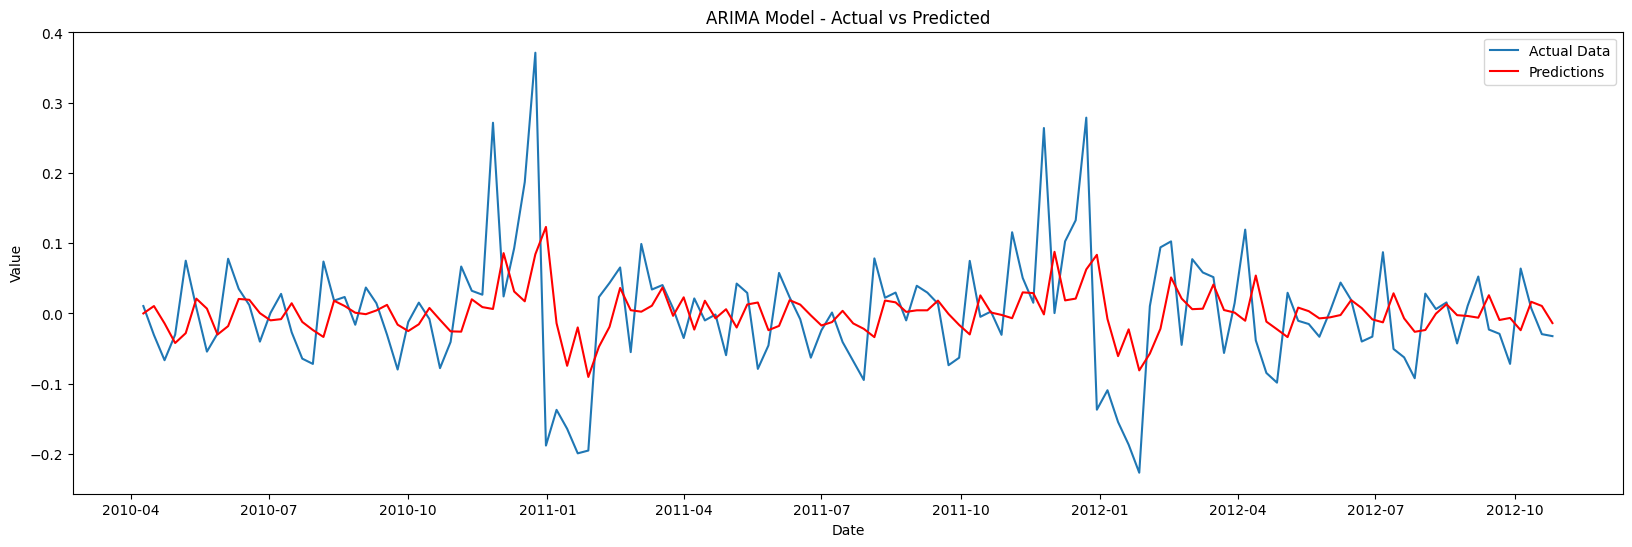

In [177]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [178]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.006983015956012575


In [179]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.0835644419356258


In [180]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [181]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [182]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [183]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [184]:
forecast_df.set_index('Date',inplace=True)

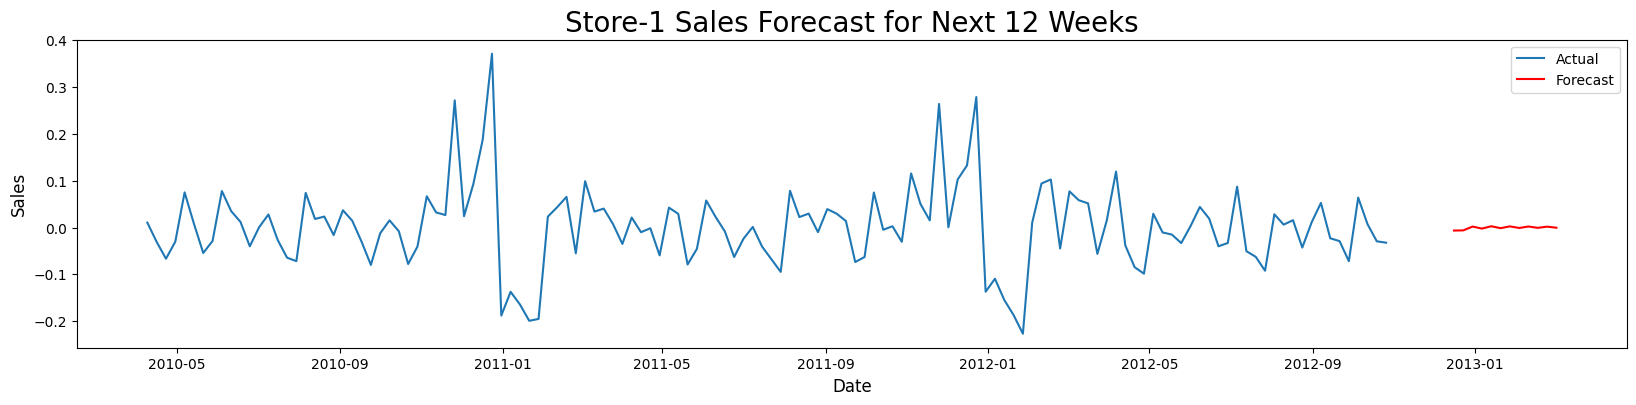

In [185]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [186]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.0835644419356258


## **Best performance Store 19 Sales Forecast**

In [193]:
# Creating a new data frame for store 19 sales forecast
store19_sales=df[df['Store']==19].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [194]:
store19_sales.set_index('Date',inplace=True) # Setting the date as index

In [195]:
adf_test(store19_sales['Weekly_Sales']) # Checking the pvalue and data stationarity

Reject the null hypothesis. The data is stationary


In [199]:
decomposition19=seasonal_decompose(store19_sales['Weekly_Sales'],period=13)# plotting the components of time series data

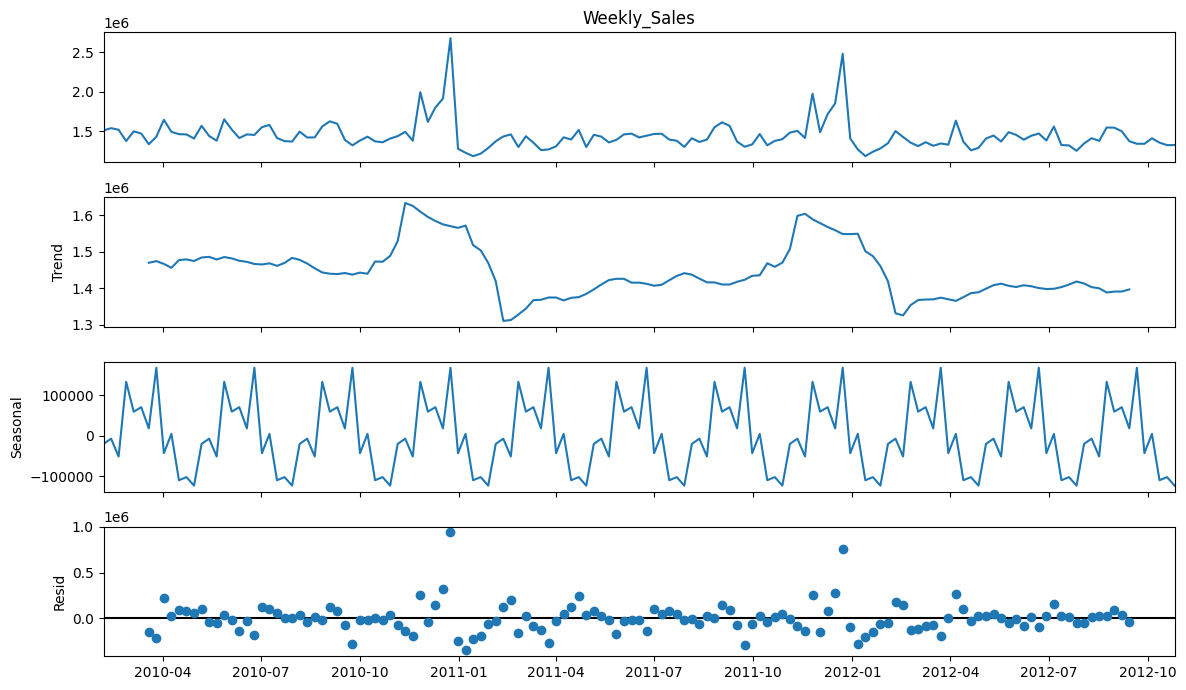

In [201]:
decomposition19.plot()
plt.rc("figure",figsize=(12,7))
plt.show()

In [202]:
mean1=store19_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store19_sales.rolling(window=10).std() # Creating the Rolling standard deviation

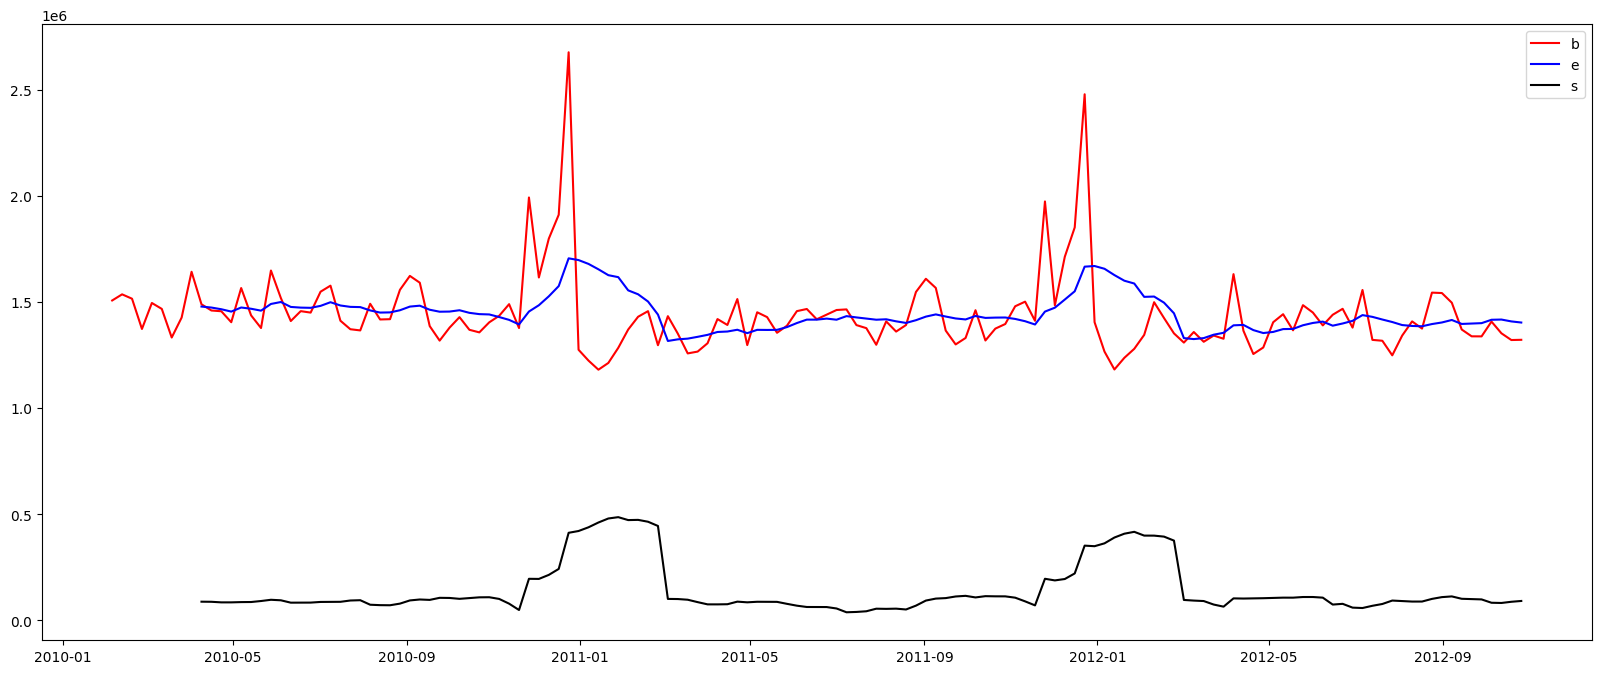

In [204]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store19_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

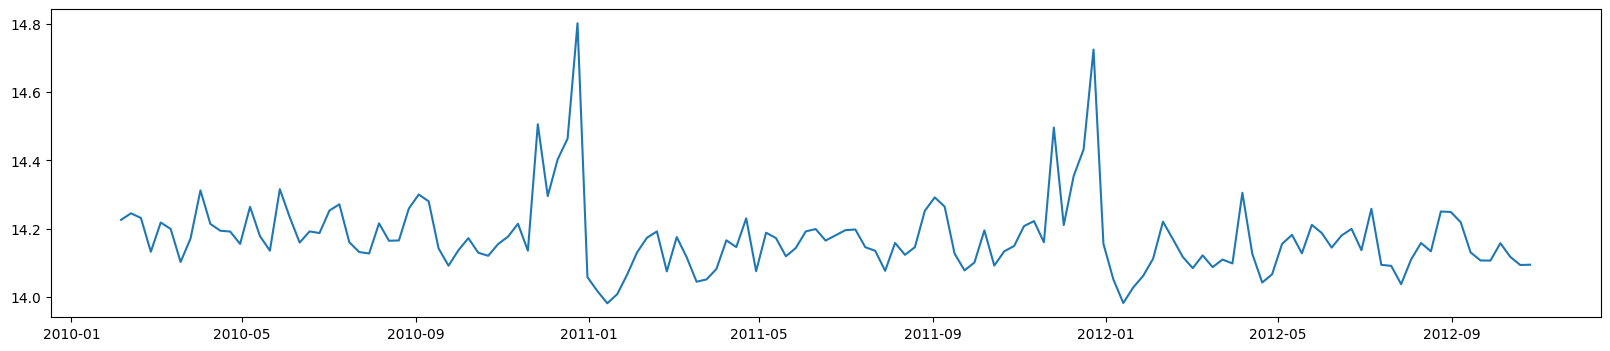

In [205]:
df_log = np.log(store19_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

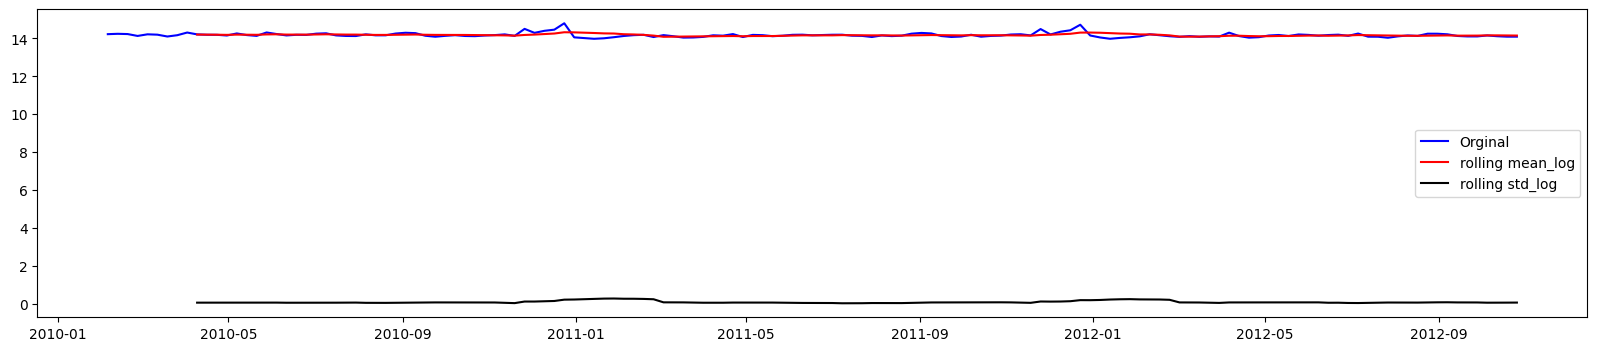

In [206]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [207]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.008731
2010-04-16     -0.007920
2010-04-23     -0.005031
2010-04-30     -0.033587
2010-05-07      0.061847
2010-05-14     -0.020047
2010-05-21     -0.056060
2010-05-28      0.102339
2010-06-04      0.014056
2010-06-11     -0.044688
2010-06-18     -0.009975

In [208]:
df_new.dropna(inplace = True) # dropping the nan values

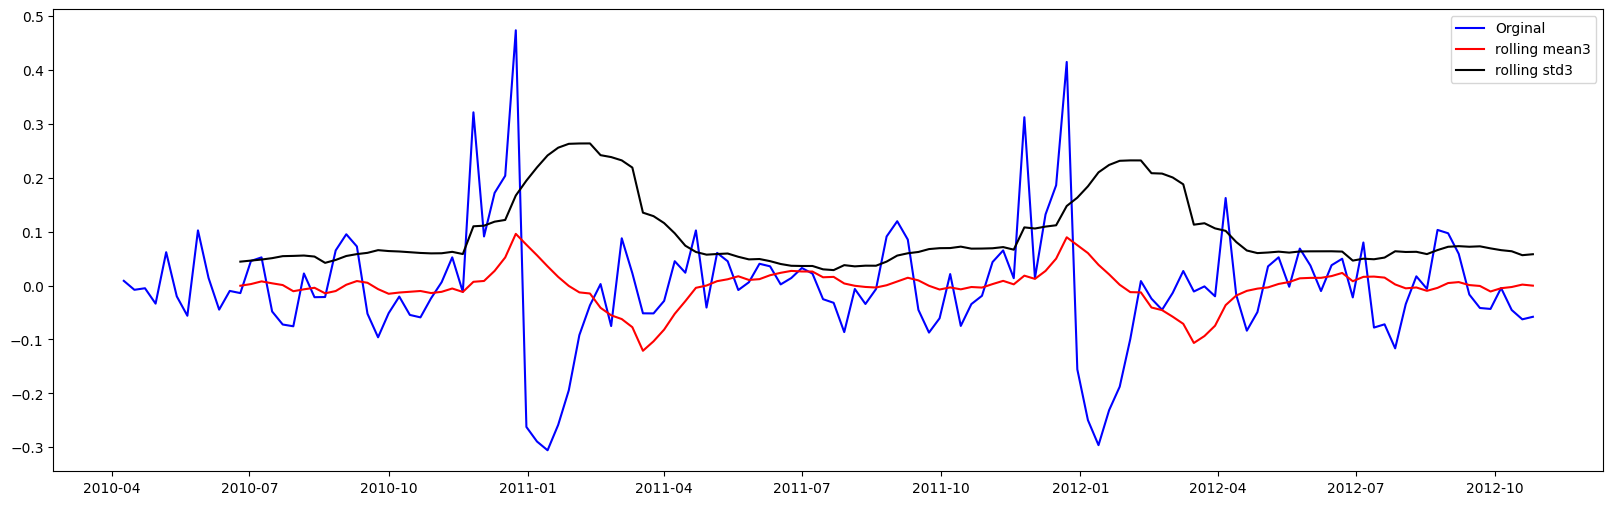

In [209]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean3 = df_new.rolling(window = 12).mean()
std3 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean3, color = 'red', label = 'rolling mean3')
plt.plot(std3, color = 'black', label = 'rolling std3')
plt.legend(loc = 'best')
plt.show()

In [211]:
adf_test(df_new['Weekly_Sales'])

Reject the null hypothesis. The data is stationary


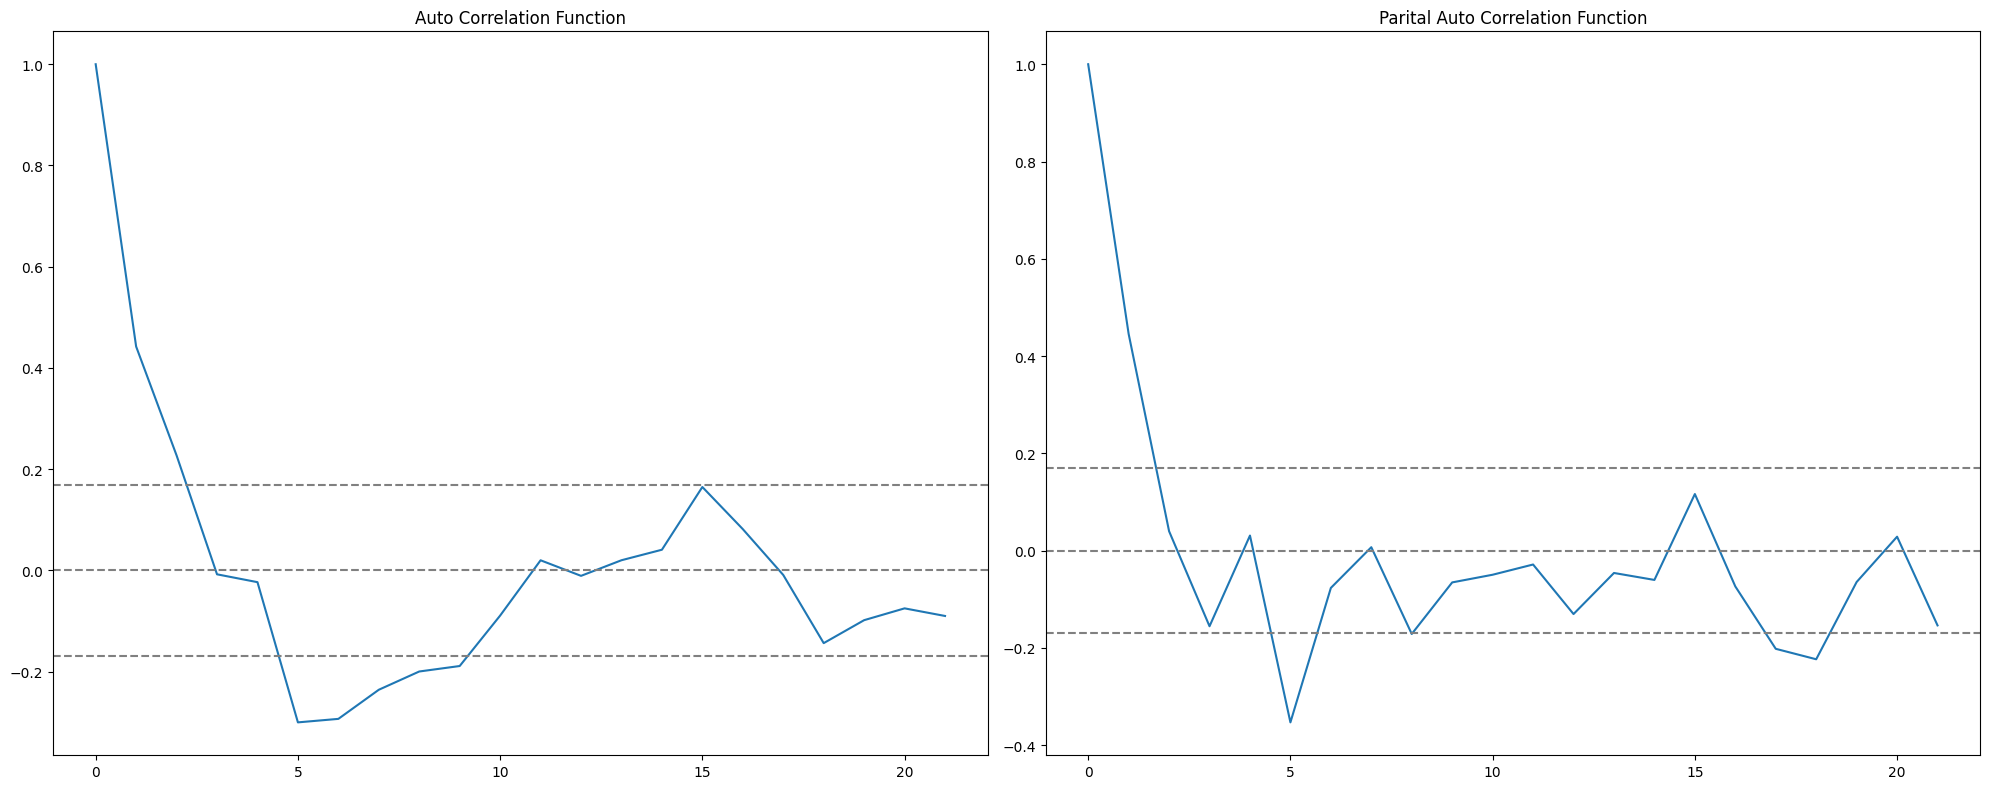

In [212]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [213]:
#pdq values are 4,1,3
p, d, q = 4, 1, 3  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

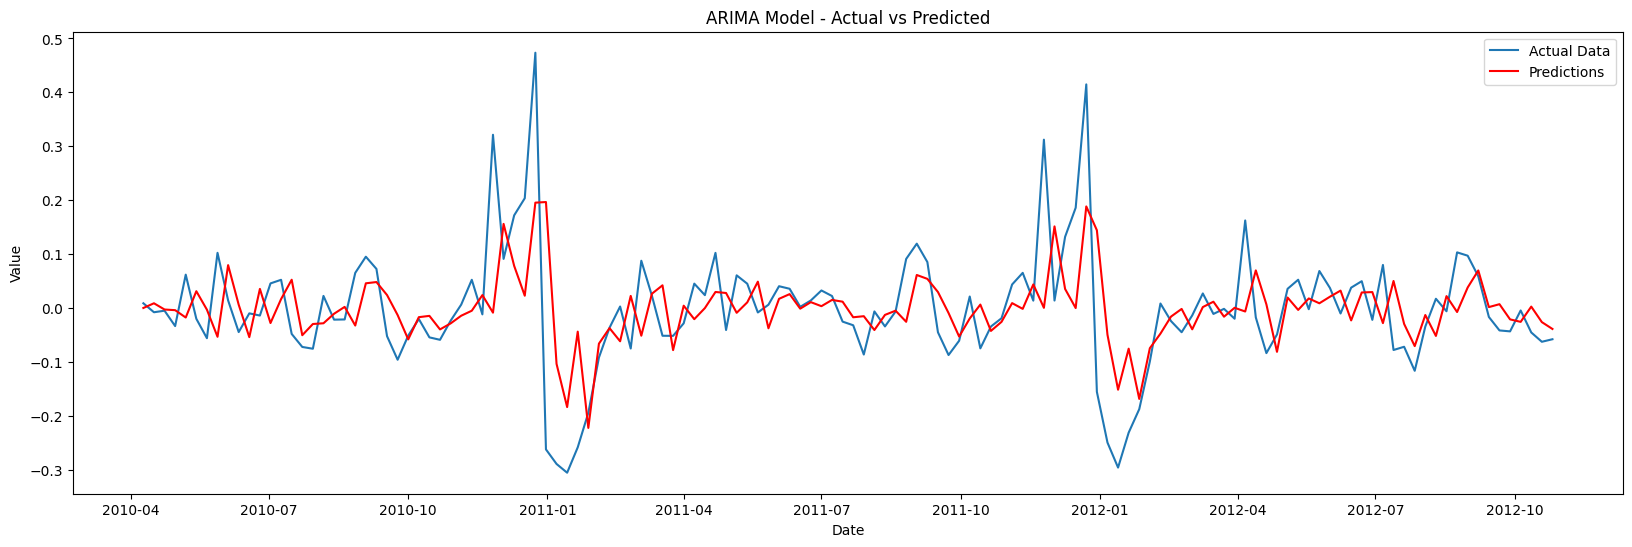

In [214]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [215]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.009588078631567642


In [216]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.09791873483439031
